In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import math
import time
from IPython.display import clear_output

In [5]:
RS = pd.read_csv("20190106_RESULTS_FULL.csv")

In [2]:
RS = pd.read_csv("20190202_RS_with_Rucurrentshop")

In [3]:
list(RS)

['Unnamed: 0',
 'PRICE_DIFF',
 'LSTM_B50_1_60k',
 'LSTM_B50_2_65k',
 'LSTM_B50_3_75k',
 'LSTM_B50_Sharpe_14k',
 'LSTM_B50_Dempster_55k',
 'LSTM_B50_no_fees_1_70k',
 'LSTM_B50_no_fees_2_65k',
 'RNN_B50_1_70k',
 'RNN_B50_2_60k',
 'LSTM_B50_Stacked_N10_70k',
 'LSTM_B50_Stacked_N20_70k',
 'LSTM_B50_Stacked_N40_55k',
 'SL_LSTM_B50_N30_50k',
 'SL_RNN_B50_N30',
 'SHOP_LSTM_B50_FEE20_68k',
 'SHOP_RNN_B50_FEE20_60k',
 'RECURRENT_LSTM_B50_REAL_FEE20_68k',
 'RECURRENT_RNN_B50_REAL_FEE20_60k',
 'RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k',
 'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_1_59k',
 'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt',
 'RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k']

In [4]:
RS = RS.drop(['Unnamed: 0'], axis=1)

In [5]:
RS.shape

(5400, 27)

In [4]:
RS = RS.rename(columns={"LSTM_B50_no_fees_70k": "LSTM_B50_no_fees_1_70k"})

In [5]:
LSTM_B50_no_fees_2_65k = pd.read_csv("20190104-yhat_test_lstm_rl_50_batch_FULL_no_fees_60neurons.csv", header=None)

In [264]:
LSTM_B50_no_fees_2_65k.shape

(5400, 2)

In [ ]:
# RECURRENT_LSTM_B50_REAL_FEE20_68k = pd.read_csv('20190104-yhat_test_lstm_rl_50_batch_recurrentshop_FULL_60neurons.csv', header=None)

# RECURRENT_RNN_B50_REAL_FEE20_60k = pd.read_csv('20190104-yhat_test_rnn_rl_50_batch_recurrentshop_FULL_60neurons.csv', header=None)

# RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k = pd.read_csv('20190107-yhat_test_lstm_rl_50_batch_recurrentshop_Sharpe_FULL_60neurons.csv', header=None)

# RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k = pd.read_csv('20190107-yhat_test_lstm_rl_50_batch_recurrentshop_Dempster025_FULL_60neurons.csv', header=None)

# RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k = pd.read_csv('20190108-yhat_test_lstm_rl_50_batch_recurrentshop_Dempster075_FULL_60neurons.csv', header=None)

# RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_1_59k = pd.read_csv("20190107-yhat_test_lstm_rl_50_batch_recurrentshop_Stacked_adv_FULL_20neurons_TCs20xsmaller.csv", header=None)

# RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k = pd.read_csv("20190110-yhat_test_lstm_rl_50_batch_recurrentshop_Stacked_adv_FULL_20neurons_TCs20xsmaller_v2.csv", header=None)



# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt = pd.read_csv('20190112-yhat_test_lstm_rl_50_batch_recurrentshop_Sharpe_sqrt.csv', header=None)

# RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k = pd.read_csv('20190113_yhat_FULL_Multi_Utility.csv', header=None)



In [6]:
RS = pd.concat([RS[['PRICE_DIFF',
            'LSTM_B50_1_60k',
            'LSTM_B50_2_65k',
            'LSTM_B50_3_75k',
            'LSTM_B50_Sharpe_14k',
            'LSTM_B50_Dempster_55k',
            'LSTM_B50_no_fees_1_70k']],

            LSTM_B50_no_fees_2_65k[1],

            RS[['RNN_B50_1_70k',
             'RNN_B50_2_60k',
             'LSTM_B50_Stacked_N10_70k',
             'LSTM_B50_Stacked_N20_70k',
             'LSTM_B50_Stacked_N40_55k',
             'SL_LSTM_B50_N30_50k',
             'SL_RNN_B50_N30']]], axis = 1)


In [42]:
RS.shape

(5400, 15)

In [268]:
list(RS)

['PRICE_DIFF',
 'LSTM_B50_1_60k',
 'LSTM_B50_2_65k',
 'LSTM_B50_3_75k',
 'LSTM_B50_Sharpe_14k',
 'LSTM_B50_Dempster_55k',
 'LSTM_B50_no_fees_1_70k',
 'LSTM_B50_no_fees_2_65k',
 'RNN_B50_1_70k',
 'RNN_B50_2_60k',
 'LSTM_B50_Stacked_N10_70k',
 'LSTM_B50_Stacked_N20_70k',
 'LSTM_B50_Stacked_N40_55k',
 'SL_LSTM_B50_N30_50k',
 'SL_RNN_B50_N30']

In [7]:
RS = RS.rename(columns={ 1: "LSTM_B50_no_fees_2_65k"})

# Real price read csv

In [6]:
df = pd.read_csv('bitflyerJPY_1-min_data_2017-07-04_to_2018-06-27.csv')

# Take the hourly mean

df['hour'] = pd.to_datetime(df['Timestamp'],unit='s').dt.floor('60 min')
group = df.groupby('hour')

# df['minute'] = pd.to_datetime(df['Timestamp'],unit='s').dt.floor('1 min')
# group = df.groupby('minute')

Real_Price = group['Weighted_Price'].mean()
Real_Price = pd.DataFrame(Real_Price)


Real_Price['Diff'] = Real_Price['Weighted_Price'].diff()
Real_Price = Real_Price[1:]


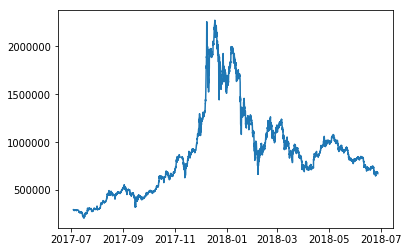

In [57]:
plt.plot(Real_Price[:8400])
plt.show()

In [65]:
type(Real_Price)

pandas.core.frame.DataFrame

In [70]:
list(Real_Price)

['Weighted_Price', 'Diff']

In [73]:
Real_Price.shape

(8490, 2)

In [7]:
### Drop rows with zero change - 37 obs.
Real_Price = Real_Price[Real_Price['Diff'] != 0]

In [8]:
Real_Price = Real_Price[60:]  #Cut the empty timesteps

In [78]:
Real_Price.shape

(8430, 2)

In [9]:
Real_Price = Real_Price[:8400]

In [96]:
Real_Price.tail(10)

,Weighted_Price,Diff
hour,,
2018-06-25 09:00:00,679743.672715,497.934618
2018-06-25 10:00:00,682168.849619,2425.176904
2018-06-25 11:00:00,684908.825470,2739.975852
2018-06-25 12:00:00,679029.211927,-5879.613544
2018-06-25 13:00:00,675656.686120,-3372.525806
2018-06-25 14:00:00,689478.889268,13822.203148
2018-06-25 15:00:00,693686.851180,4207.961912
2018-06-25 16:00:00,693042.615940,-644.235240
2018-06-25 17:00:00,691436.927974,-1605.687966


In [12]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,7  # figure size in inches

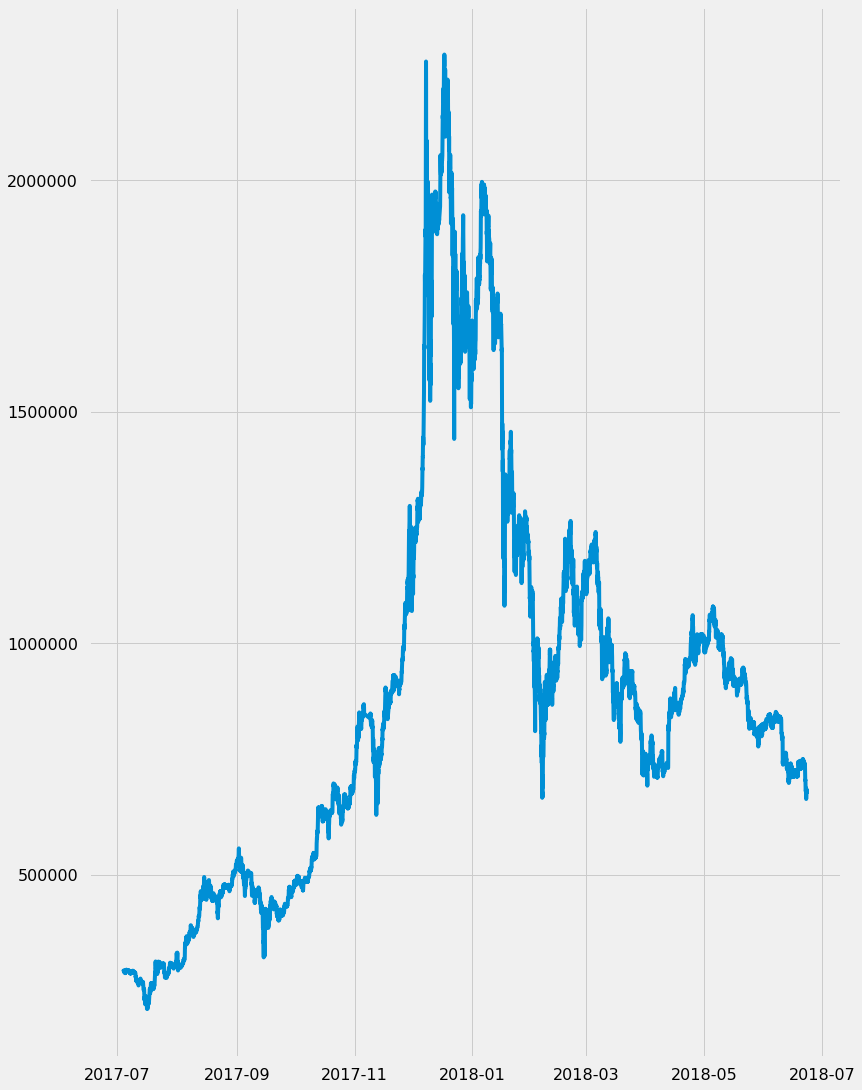

In [24]:
plt.plot(Real_Price['Weighted_Price'])
plt.show()

In [127]:
Real_Price = Real_Price/1000

In [129]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7, 6  # figure size in inches

plt.figure(1)
plt.subplot(211)
plt.plot(Real_Price['Weighted_Price'])
plt.axvline(pd.to_datetime('2017-11-01'), color='r', linestyle='--', lw=1)
plt.axhline(y=1000, color='r', linestyle='-')
plt.axhline(y=1000, color='r', linestyle='-', xmin=0.25, xmax=0.75)


plt.subplot(212)
plt.plot(Real_Price['Diff'])
plt.show()

NameError: name 'plt2' is not defined

In [133]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)

mpl.rcParams.update(mpl.rcParamsDefault)

mpl.rcParams.update(inline_rc)

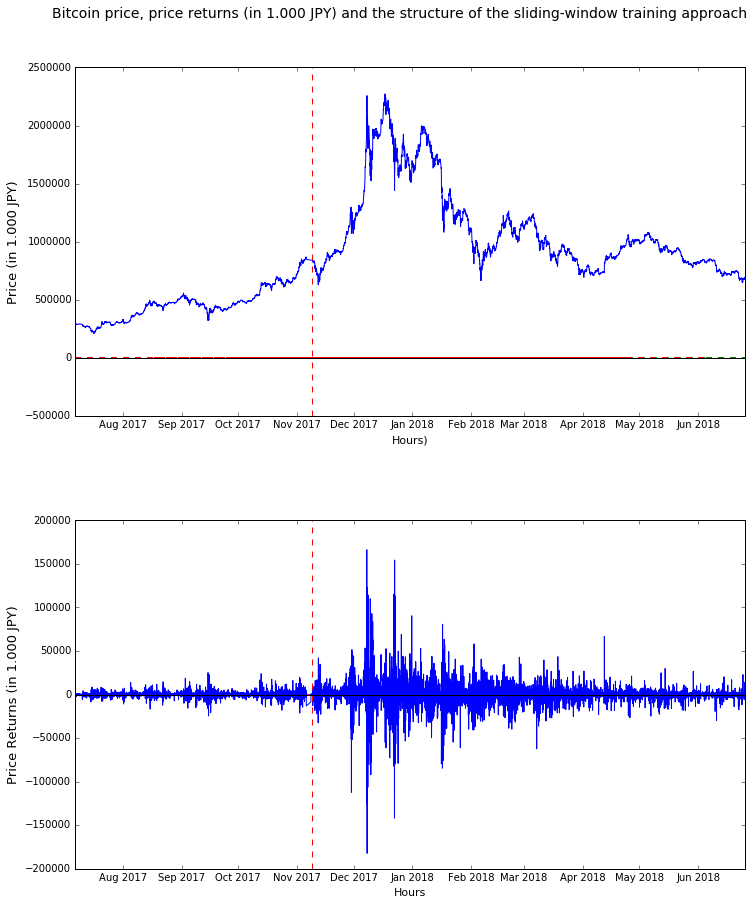

In [235]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,14  # figure size in inches

plt.clf()

fig, axs = plt.subplots(2, 1)
axs[0].plot(Real_Price['Weighted_Price'])
#axs[0].set_title('subplot 1')
axs[0].set_xlabel('Hours)', size = 11)
axs[0].set_ylabel('Price (in 1.000 JPY)', size = 13)
axs[0].axvline(pd.to_datetime("2017-11-08 21:00:00"), color='r', linestyle='--', lw=1)

axs[0].axhline(y = 0, color='black', linestyle='-',
                linewidth=1)


axs[0].hlines(y = -1400, color='r', linestyle='--', 
                xmin=pd.to_datetime('2017-07-06 21:00:00'), 
                xmax=pd.to_datetime("2017-11-08 21:00:00"),
                linewidth=2,)
axs[0].hlines(y = -1400, color='g', linestyle='--', 
                xmin=pd.to_datetime('2017-11-08 21:00:00'), 
                xmax=pd.to_datetime("2017-12-20 13:00:00"),
                linewidth=2,)

axs[0].hlines(y = -1200, color='r', linestyle='--', 
                xmin=pd.to_datetime('2017-08-17 13:00:00'), 
                xmax=pd.to_datetime("2017-12-20 13:00:00"),
                linewidth=2,)

axs[0].hlines(y = -1200, color='g', linestyle='--', 
                xmin=pd.to_datetime('2017-12-20 13:00:00'), 
                xmax=pd.to_datetime("2018-01-31 05:00:00"),
                linewidth=2,)


axs[0].hlines(y = -1000, color='r', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + 2*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 2*datetime.timedelta(hours=1000)),
                linewidth=2,)

axs[0].hlines(y = -1000, color='g', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 2*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 3*datetime.timedelta(hours=1000)),
                linewidth=2,)

axs[0].hlines(y = -800, color='r', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + 3*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 3*datetime.timedelta(hours=1000)),
                linewidth=2,)

axs[0].hlines(y = -800, color='g', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 3*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 4*datetime.timedelta(hours=1000)),
                linewidth=2,)

axs[0].hlines(y = -600, color='r', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + 4*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 4*datetime.timedelta(hours=1000)),
                linewidth=2,)

axs[0].hlines(y = -600, color='g', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 4*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 5*datetime.timedelta(hours=1000)),
                linewidth=2,)


axs[0].hlines(y = -400, color='r', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + 5*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 5*datetime.timedelta(hours=1000)),
                linewidth=2,)

axs[0].hlines(y = -400, color='g', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 5*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.max()),
                linewidth=2,)

#ax.hlines(y=0.2, xmin=4, xmax=20, linewidth=2, color='r')


fig.suptitle('Bitcoin price, price returns (in 1.000 JPY) and the structure of the sliding-window training approach', fontsize=14)

axs[1].plot(Real_Price['Diff'])
axs[1].set_xlabel('Hours', size = 11)
#axs[1].set_title('subplot 2')
axs[1].set_ylabel('Price Returns (in 1.000 JPY)', size = 13)
axs[1].axvline(pd.to_datetime("2017-11-08 21:00:00"), color='r', linestyle='--', lw=1)

axs[1].axhline(y = -200, color='black', linestyle='-',
                linewidth=1)


axs[1].hlines(y = -425, color='r', linestyle='--', 
                xmin=pd.to_datetime('2017-07-06 21:00:00'), 
                xmax=pd.to_datetime("2017-11-08 21:00:00"),
                linewidth=2,)
axs[1].hlines(y = -425, color='g', linestyle='--', 
                xmin=pd.to_datetime('2017-11-08 21:00:00'), 
                xmax=pd.to_datetime("2017-12-20 13:00:00"),
                linewidth=2,)


axs[1].hlines(y = -390, color='r', linestyle='--', 
                xmin=pd.to_datetime('2017-08-17 13:00:00'), 
                xmax=pd.to_datetime("2017-12-20 13:00:00"),
                linewidth=2,)

axs[1].hlines(y = -390, color='g', linestyle='--', 
                xmin=pd.to_datetime('2017-12-20 13:00:00'), 
                xmax=pd.to_datetime("2018-01-31 05:00:00"),
                linewidth=2,)



axs[1].hlines(y = -355, color='r', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + 2*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 2*datetime.timedelta(hours=1000)),
                linewidth=2,)

axs[1].hlines(y = -355, color='g', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 2*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 3*datetime.timedelta(hours=1000)),
                linewidth=2,)


axs[1].hlines(y = -320, color='r', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + 3*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 3*datetime.timedelta(hours=1000)),
                linewidth=2,)

axs[1].hlines(y = -320, color='g', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 3*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 4*datetime.timedelta(hours=1000)),
                linewidth=2,)


axs[1].hlines(y = -285, color='r', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + 4*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 4*datetime.timedelta(hours=1000)),
                linewidth=2,)

axs[1].hlines(y = -285, color='g', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 4*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 5*datetime.timedelta(hours=1000)),
                linewidth=2,)


axs[1].hlines(y = -250, color='r', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + 5*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 5*datetime.timedelta(hours=1000)),
                linewidth=2,)

axs[1].hlines(y = -250, color='g', linestyle='--', 
                xmin=pd.to_datetime(Real_Price.index.min() + datetime.timedelta(hours=3000) + 5*datetime.timedelta(hours=1000)), 
                xmax=pd.to_datetime(Real_Price.index.max()),
                linewidth=2,)


fig.subplots_adjust(hspace = 0.3, top = 0.92)
plt.show()


In [154]:
import datetime
Real_Price.index.min()

Timestamp('2017-07-06 21:00:00')

In [189]:
Real_Price.index.max()

Timestamp('2018-06-25 18:00:00')

In [155]:
Real_Price.index.min() + datetime.timedelta(hours=3000)

Timestamp('2017-11-08 21:00:00')

In [178]:
Real_Price.index.min() + datetime.timedelta(hours=3000) + datetime.timedelta(hours=1000) +  datetime.timedelta(hours=1000)

Timestamp('2018-01-31 05:00:00')

In [174]:
Real_Price.index.min() + datetime.timedelta(hours=1000)

Timestamp('2017-08-17 13:00:00')

# Action_from_result

In [13]:
FEE = 0.0025


def action_from_results_df(yhat_test_pre, THRESHOLD = 0.33): # read yhat as numpy array, return as DF with columns: result, action
    yhat_test = pd.DataFrame(yhat_test_pre)
    pd.options.mode.chained_assignment = None
    #yhat_test = pd.DataFrame(yhat_test, columns=['result'])
    yhat_test.columns=['price', 'result']
    yhat_test['action'] = 1
    yhat_test['action'][(yhat_test.result < -THRESHOLD)] = -1
    yhat_test['action'][(yhat_test.result > -THRESHOLD) & (yhat_test.result < THRESHOLD)] = 0
    return yhat_test


 # read yhat as DF with result and action, return as DF with added columns:price, action_diff, profit,cum_profit
def profit_from_result_df(yhat_test_pre, fee = FEE, transaction_size = 300000):    
    yhat_test = yhat_test_pre
    #yhat_test['price'] = y_test
    yhat_test['action_diff'] = yhat_test['action'].diff().abs()

    # We start from 0
    yhat_test['action_diff'][0] = abs(yhat_test['action'][0])

#     yhat_test['profit'] = yhat_test['price']*yhat_test['action'] - yhat_test['action_diff'].abs()*fee*transaction_size
#     yhat_test['profit_cum'] = yhat_test['profit'].cumsum()

    yhat_test['profit_rescale'] = yhat_test['price']*yhat_test['action'] - yhat_test['action_diff'].abs()*fee*transaction_size
    yhat_test['profit_cum_rescale'] = yhat_test['profit_rescale'].cumsum()
    
    yhat_test['profit_rescale_1k'] = (yhat_test['price']*yhat_test['action'] - yhat_test['action_diff'].abs()*fee*transaction_size)/1000
    yhat_test['profit_cum_rescale_1k'] = (yhat_test['profit_rescale'].cumsum())/1000
    return yhat_test

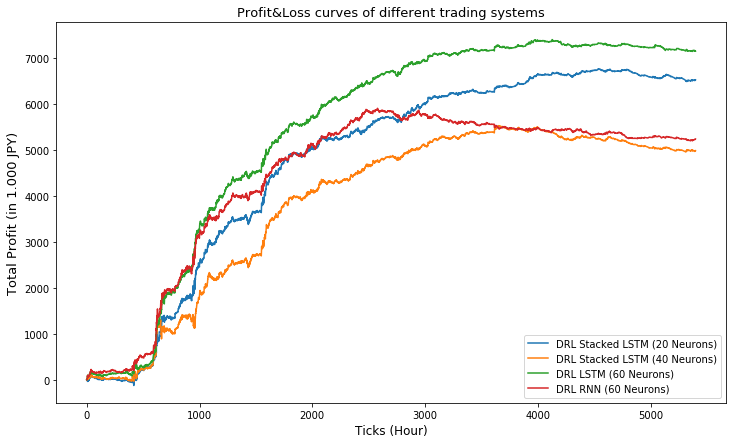

In [31]:
Z = 1

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z)

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z)

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_3_75k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p = profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z)



plt.plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (20 Neurons)')
plt.plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (40 Neurons)')
plt.plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (60 Neurons)')
plt.plot(RNN_B50_2_60k_p['profit_cum_rescale_1k'] , label = 'DRL RNN (60 Neurons)')
plt.xlabel("Ticks (Hour)", size = 12)
plt.ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
plt.title("Profit&Loss curves of different trading systems", size = 13)
plt.legend(loc = 4)
plt.show()

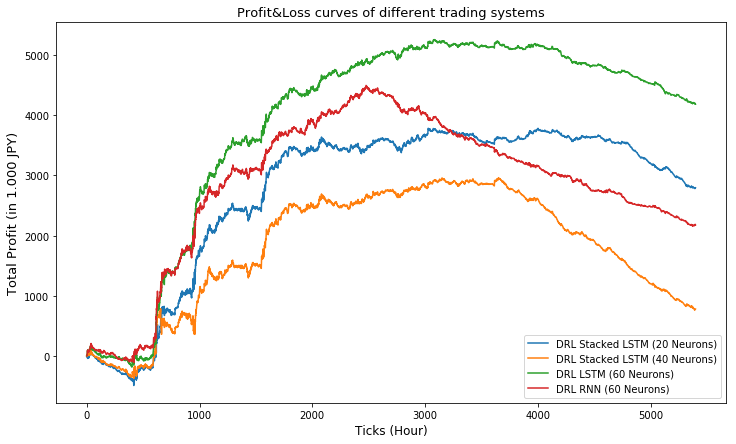

In [32]:
Z = 2

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z)

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z)

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_3_75k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p = profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z)



plt.plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (20 Neurons)')
plt.plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (40 Neurons)')
plt.plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (60 Neurons)')
plt.plot(RNN_B50_2_60k_p['profit_cum_rescale_1k'] , label = 'DRL RNN (60 Neurons)')
plt.xlabel("Ticks (Hour)", size = 12)
plt.ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
plt.title("Profit&Loss curves of different trading systems", size = 13)
plt.legend(loc = 4)
plt.show()

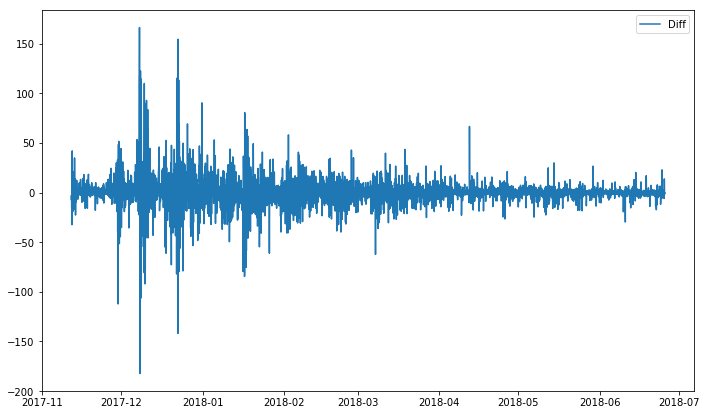

In [290]:
plt.plot(Real_Price['Diff'][3000:], label = 'DRL Stacked LSTM (20 Neurons)')
plt.legend()
plt.show()

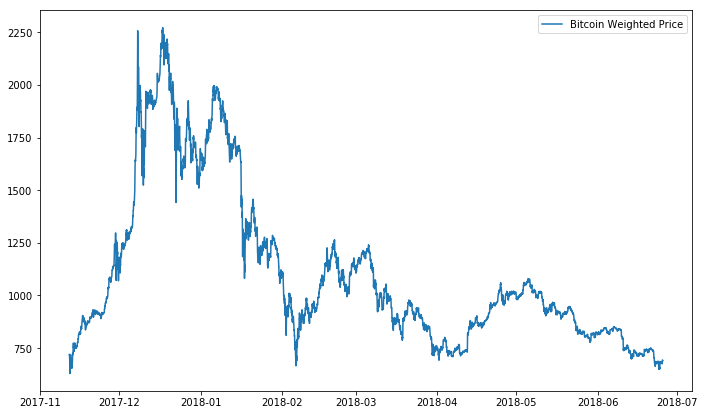

In [292]:
plt.plot(Real_Price['Weighted_Price'][3000:], label = 'Bitcoin Weighted Price')
#plt.legend()
plt.show()

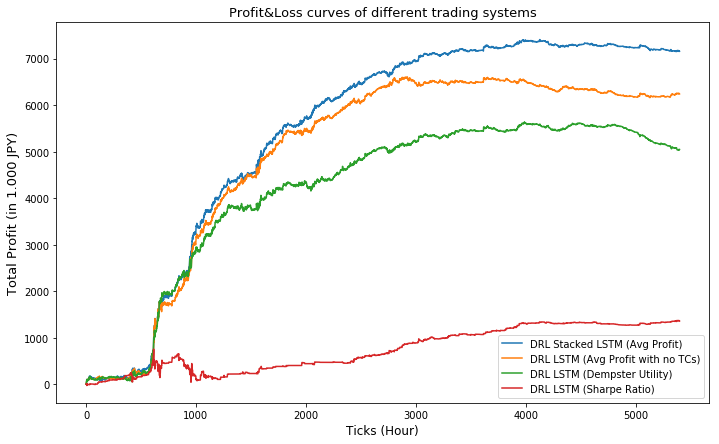

In [441]:
Z = 1

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_3_75k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

LSTM_B50_Sharpe_14k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Sharpe_14k"]], THRESHOLD = 0.33)
LSTM_B50_Sharpe_14k_p = profit_from_result_df(LSTM_B50_Sharpe_14k_a, fee = FEE*Z)

LSTM_B50_Dempster_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Dempster_55k"]], THRESHOLD = 0.33)
LSTM_B50_Dempster_55k_p = profit_from_result_df(LSTM_B50_Dempster_55k_a, fee = FEE*Z)

LSTM_B50_no_fees_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_no_fees_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_no_fees_2_65k_p = profit_from_result_df(LSTM_B50_no_fees_2_65k_a, fee = FEE*Z)



plt.plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (Avg Profit)')
plt.plot(LSTM_B50_no_fees_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (Avg Profit with no TCs)')
plt.plot(LSTM_B50_Dempster_55k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (Dempster Utility)')
plt.plot(LSTM_B50_Sharpe_14k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (Sharpe Ratio)')
plt.xlabel("Ticks (Hour)", size = 12)
plt.ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
plt.title("Profit&Loss curves of different trading systems", size = 13)
plt.legend(loc = 4)
plt.show()

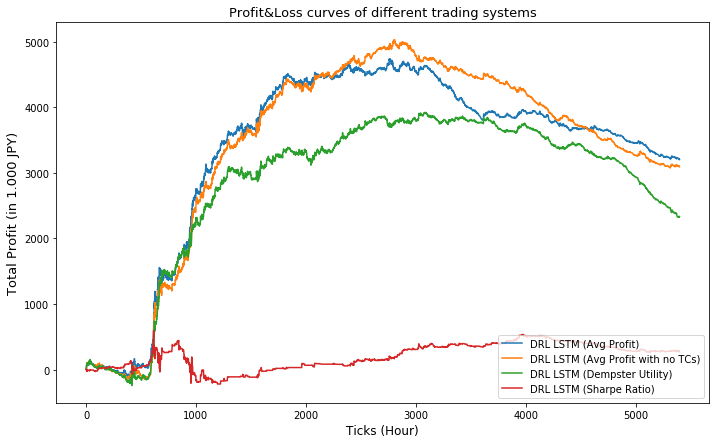

In [471]:
Z = 2

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

LSTM_B50_Sharpe_14k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Sharpe_14k"]], THRESHOLD = 0.33)
LSTM_B50_Sharpe_14k_p = profit_from_result_df(LSTM_B50_Sharpe_14k_a, fee = FEE*Z)

LSTM_B50_Dempster_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Dempster_55k"]], THRESHOLD = 0.33)
LSTM_B50_Dempster_55k_p = profit_from_result_df(LSTM_B50_Dempster_55k_a, fee = FEE*Z)

LSTM_B50_no_fees_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_no_fees_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_no_fees_2_65k_p = profit_from_result_df(LSTM_B50_no_fees_2_65k_a, fee = FEE*Z)



plt.plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (Avg Profit)')
plt.plot(LSTM_B50_no_fees_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (Avg Profit with no TCs)')
plt.plot(LSTM_B50_Dempster_55k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (Dempster Utility)')
plt.plot(LSTM_B50_Sharpe_14k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (Sharpe Ratio)')
plt.xlabel("Ticks (Hour)", size = 12)
plt.ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
plt.title("Profit&Loss curves of different trading systems", size = 13)
plt.legend(loc = 4)
plt.show()

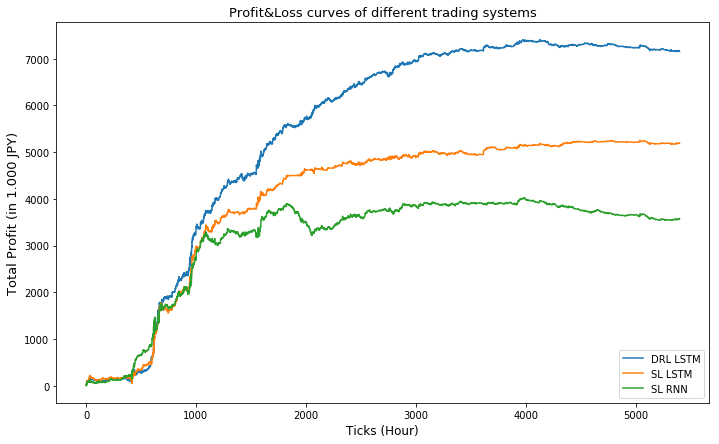

In [442]:
Z = 1

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_3_75k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

SL_LSTM_B50_N30_50k_a = action_from_results_df(RS[["PRICE_DIFF", "SL_LSTM_B50_N30_50k"]], THRESHOLD = 0.05)
SL_LSTM_B50_N30_50k_p = profit_from_result_df(SL_LSTM_B50_N30_50k_a, fee = FEE*Z)

SL_RNN_B50_N30_a = action_from_results_df(RS[["PRICE_DIFF", "SL_RNN_B50_N30"]], THRESHOLD = 0.05)
SL_RNN_B50_N30_p = profit_from_result_df(SL_RNN_B50_N30_a, fee = FEE*Z)



plt.plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM')
plt.plot(SL_LSTM_B50_N30_50k_p['profit_cum_rescale_1k'] , label = 'SL LSTM')
plt.plot(SL_RNN_B50_N30_p['profit_cum_rescale_1k'] , label = 'SL RNN')

plt.xlabel("Ticks (Hour)", size = 12)
plt.ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
plt.title("Profit&Loss curves of different trading systems", size = 13)
plt.legend(loc = 4)
plt.show()

In [337]:
# plt.plot(SL_RNN_B50_N30_a['action'])
# plt.show()

In [15]:
SHOP_LSTM_B50_FEE20_68k = pd.read_csv("20190104-yhat_test_lstm_rl_50_batch_recurrentshop_FULL_60neurons.csv", header=None)

In [16]:
SHOP_RNN_B50_FEE20_60k = pd.read_csv("20190104-yhat_test_rnn_rl_50_batch_recurrentshop_FULL_60neurons.csv", header=None)

In [17]:
SHOP_LSTM_B50_FEE20_68k = SHOP_LSTM_B50_FEE20_68k[:5400]

In [18]:
SHOP_RNN_B50_FEE20_60k = SHOP_RNN_B50_FEE20_60k[:5400]

In [19]:
RS = pd.concat([RS, SHOP_LSTM_B50_FEE20_68k[1]], axis = 1)

In [373]:
list(RS)

['PRICE_DIFF',
 'LSTM_B50_1_60k',
 'LSTM_B50_2_65k',
 'LSTM_B50_3_75k',
 'LSTM_B50_Sharpe_14k',
 'LSTM_B50_Dempster_55k',
 'LSTM_B50_no_fees_1_70k',
 'LSTM_B50_no_fees_2_65k',
 'RNN_B50_1_70k',
 'RNN_B50_2_60k',
 'LSTM_B50_Stacked_N10_70k',
 'LSTM_B50_Stacked_N20_70k',
 'LSTM_B50_Stacked_N40_55k',
 'SL_LSTM_B50_N30_50k',
 'SL_RNN_B50_N30',
 'SHOP_LSTM_B50_FEE20_68k',
 'SHOP_RNN_B50_FEE20_60k']

In [366]:
# RS = RS.drop([1], axis=1)

In [20]:
RS = RS.rename(columns={ 1: "SHOP_LSTM_B50_FEE20_68k"})

In [21]:
RS = pd.concat([RS, SHOP_RNN_B50_FEE20_60k[1]], axis = 1)

In [22]:
RS = RS.rename(columns={ 1: "SHOP_RNN_B50_FEE20_60k"})

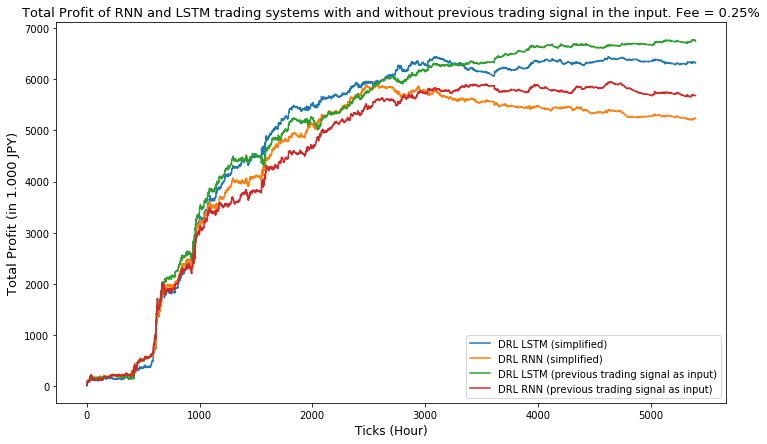

In [33]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,7 # figure size in inches

plt.clf()


Z = 1

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z)

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z)

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p = profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z)


SHOP_LSTM_B50_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_LSTM_B50_FEE20_68k"]], THRESHOLD = 0.33)
SHOP_LSTM_B50_FEE20_68k_p = profit_from_result_df(SHOP_LSTM_B50_FEE20_68k_a, fee = FEE*Z)

SHOP_RNN_B50_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_RNN_B50_FEE20_60k"]], THRESHOLD = 0.33)
SHOP_RNN_B50_FEE20_60k_p = profit_from_result_df(SHOP_RNN_B50_FEE20_60k_a, fee = FEE*Z)


# plt.plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (20 Neurons)')
# plt.plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (40 Neurons)')
plt.plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (simplified)')
plt.plot(RNN_B50_2_60k_p['profit_cum_rescale_1k'] , label = 'DRL RNN (simplified)')
plt.plot(SHOP_LSTM_B50_FEE20_68k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (previous trading signal as input)')
plt.plot(SHOP_RNN_B50_FEE20_60k_p['profit_cum_rescale_1k'] , label = 'DRL RNN (previous trading signal as input)')
plt.xlabel("Ticks (Hour)", size = 12)
plt.ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
plt.title("Total Profit of RNN and LSTM trading systems with and without previous trading signal in the input. Fee = 0.25%", size = 13)
plt.legend(loc = 4)
plt.show()

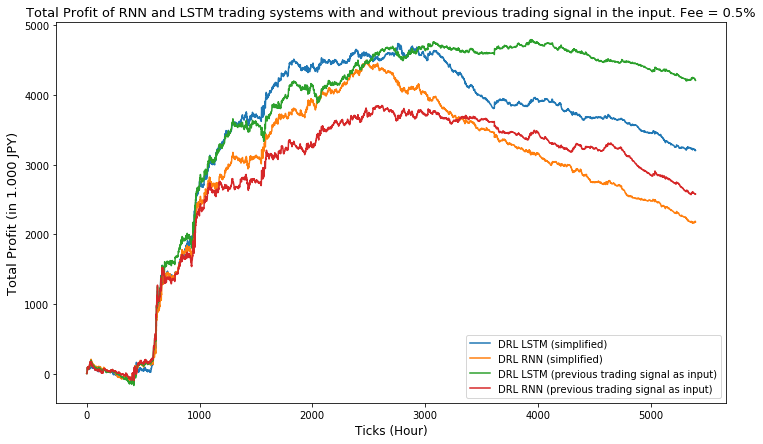

In [34]:
Z = 2

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z)

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z)



LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p_2 = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p_2 = profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z)


SHOP_LSTM_B50_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_LSTM_B50_FEE20_68k"]], THRESHOLD = 0.33)
SHOP_LSTM_B50_FEE20_68k_p_2 = profit_from_result_df(SHOP_LSTM_B50_FEE20_68k_a, fee = FEE*Z)

SHOP_RNN_B50_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_RNN_B50_FEE20_60k"]], THRESHOLD = 0.33)
SHOP_RNN_B50_FEE20_60k_p_2 = profit_from_result_df(SHOP_RNN_B50_FEE20_60k_a, fee = FEE*Z)


# plt.plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (20 Neurons)')
# plt.plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (40 Neurons)')
plt.plot(LSTM_B50_2_65k_p_2['profit_cum_rescale_1k'] , label = 'DRL LSTM (simplified)')
plt.plot(RNN_B50_2_60k_p_2['profit_cum_rescale_1k'] , label = 'DRL RNN (simplified)')
plt.plot(SHOP_LSTM_B50_FEE20_68k_p_2['profit_cum_rescale_1k'] , label = 'DRL LSTM (previous trading signal as input)')
plt.plot(SHOP_RNN_B50_FEE20_60k_p_2['profit_cum_rescale_1k'] , label = 'DRL RNN (previous trading signal as input)')
plt.xlabel("Ticks (Hour)", size = 12)
plt.ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
plt.title("Total Profit of RNN and LSTM trading systems with and without previous trading signal in the input. Fee = 0.5%", size = 13)
plt.legend(loc = 4)
plt.show()

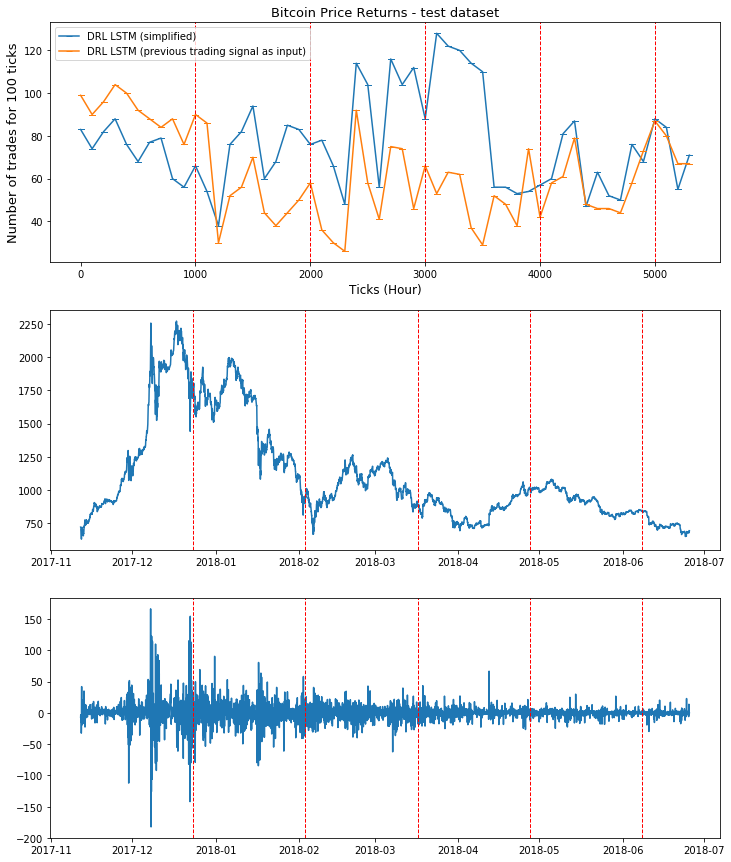

In [543]:
#### from matplotlib import rcParams
rcParams['figure.figsize'] = 12,15  # figure size in inches

plt.clf()

fig, axs = plt.subplots(3, 1)

axs[0].plot(trading_freq(LSTM_B50_2_65k_p) , label = 'DRL LSTM (simplified)', marker = '_')
axs[0].plot(trading_freq(SHOP_LSTM_B50_FEE20_68k_p) , label = 'DRL LSTM (previous trading signal as input)', marker = '_')
axs[0].set_xlabel("Ticks (Hour)", size = 12)
axs[0].set_ylabel("Number of trades for 100 ticks", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("Profit&Loss curves of different trading systems", size = 13)

axs[0].axvline(1000, color='r', linestyle='--', lw=1)
axs[0].axvline(2000, color='r', linestyle='--', lw=1)
axs[0].axvline(3000, color='r', linestyle='--', lw=1)
axs[0].axvline(4000, color='r', linestyle='--', lw=1)
axs[0].axvline(5000, color='r', linestyle='--', lw=1)

axs[0].legend()


axs[1].plot(Real_Price['Weighted_Price'][3000:], label = 'Bitcoin Weighted Price')
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[0].set_title("Bitcoin Weighted Price - test dataset", size = 13)

axs[2].plot(Real_Price['Diff'][3000:], label = 'Bitcoin Price Returns')
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[0].set_title("Bitcoin Price Returns - test dataset", size = 13)
plt.show()

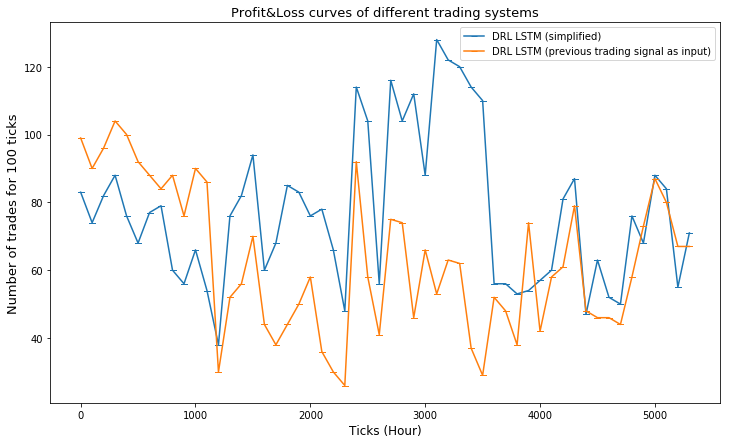

In [506]:
plt.plot(trading_freq(LSTM_B50_2_65k_p) , label = 'DRL LSTM (simplified)', marker = '_')
plt.plot(trading_freq(SHOP_LSTM_B50_FEE20_68k_p) , label = 'DRL LSTM (previous trading signal as input)', marker = '_')
plt.xlabel("Ticks (Hour)", size = 12)
plt.ylabel("Number of trades for 100 ticks", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
plt.title("Profit&Loss curves of different trading systems", size = 13)
plt.legend()
plt.show()

In [524]:
Real_Price.index[3000]

Timestamp('2017-11-11 23:00:00')

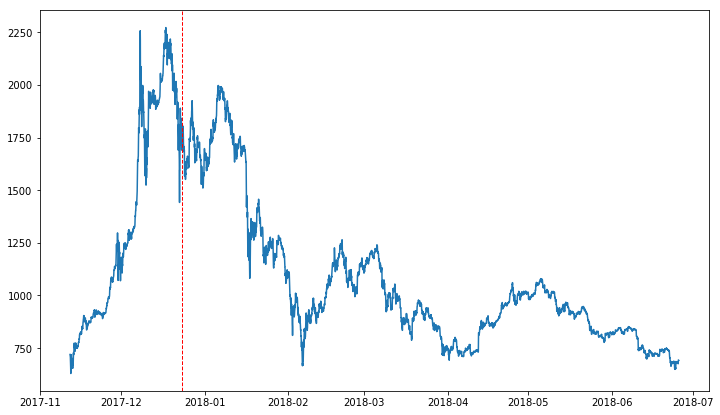

In [527]:
plt.plot(Real_Price['Weighted_Price'][3000:], label = 'Bitcoin Weighted Price')
plt.axvline(Real_Price.index[3000] + datetime.timedelta(hours=1000), color='r', linestyle='--', lw=1)

plt.show()

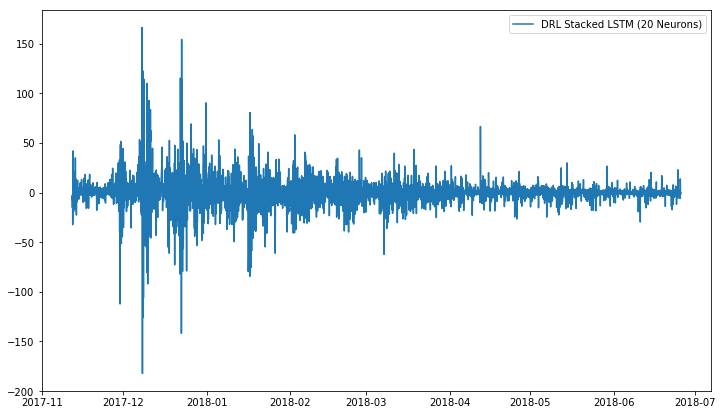

In [507]:
plt.plot(Real_Price['Diff'][3000:], label = 'DRL Stacked LSTM (20 Neurons)')
plt.legend()
plt.show()

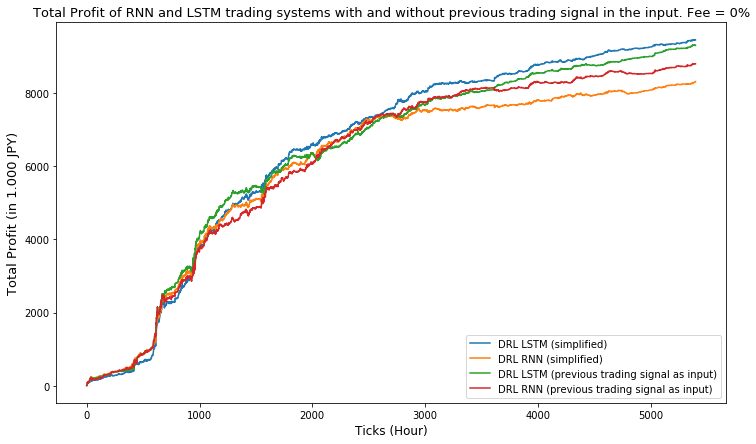

In [35]:
Z = 0

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p_0 = profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z)

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p_0 = profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z)

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p_0 = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p_0 = profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z)


SHOP_LSTM_B50_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_LSTM_B50_FEE20_68k"]], THRESHOLD = 0.33)
SHOP_LSTM_B50_FEE20_68k_p_0 = profit_from_result_df(SHOP_LSTM_B50_FEE20_68k_a, fee = FEE*Z)

SHOP_RNN_B50_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_RNN_B50_FEE20_60k"]], THRESHOLD = 0.33)
SHOP_RNN_B50_FEE20_60k_p_0 = profit_from_result_df(SHOP_RNN_B50_FEE20_60k_a, fee = FEE*Z)


# plt.plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (20 Neurons)')
# plt.plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (40 Neurons)')
plt.plot(LSTM_B50_2_65k_p_0['profit_cum_rescale_1k'] , label = 'DRL LSTM (simplified)')
plt.plot(RNN_B50_2_60k_p_0['profit_cum_rescale_1k'] , label = 'DRL RNN (simplified)')
plt.plot(SHOP_LSTM_B50_FEE20_68k_p_0['profit_cum_rescale_1k'] , label = 'DRL LSTM (previous trading signal as input)')
plt.plot(SHOP_RNN_B50_FEE20_60k_p_0['profit_cum_rescale_1k'] , label = 'DRL RNN (previous trading signal as input)')
plt.xlabel("Ticks (Hour)", size = 12)
plt.ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
plt.title("Total Profit of RNN and LSTM trading systems with and without previous trading signal in the input. Fee = 0%", size = 13)
plt.legend(loc = 4)
plt.show()

In [448]:
LSTM_B50_2_65k_p = LSTM_B50_2_65k_p.reset_index()
LSTM_B50_2_65k_p["index_bin"] = (round(np.floor(LSTM_B50_2_65k_p["index"].astype(float)/100))*100).astype(int)
LSTM_B50_2_65k_p_grouped100 = LSTM_B50_2_65k_p.groupby("index_bin").action_diff.sum()
LSTM_B50_2_65k_p_grouped100_rep = LSTM_B50_2_65k_p_grouped100.iloc[np.arange(len(LSTM_B50_2_65k_p_grouped100)).repeat(100)]

In [478]:
def trading_freq(DF_p, bins = 100):
    DF_p = DF_p.reset_index()
    DF_p["index_bin"] = (round(np.floor(DF_p["index"].astype(float)/bins))*bins).astype(int)
    grouped100 = DF_p.groupby("index_bin").action_diff.sum()
    grouped100_rep = grouped100.iloc[np.arange(len(grouped100)).repeat(bins)]
    return grouped100_rep

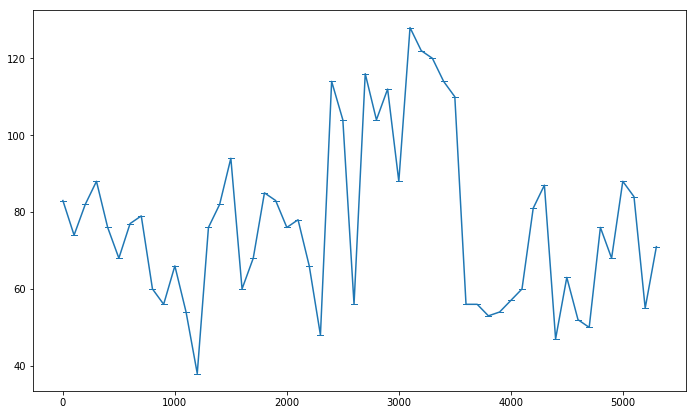

In [458]:
plt.plot(LSTM_B50_2_65k_p_grouped100_rep , label = 'Number of trades', marker = '_')
plt.show()



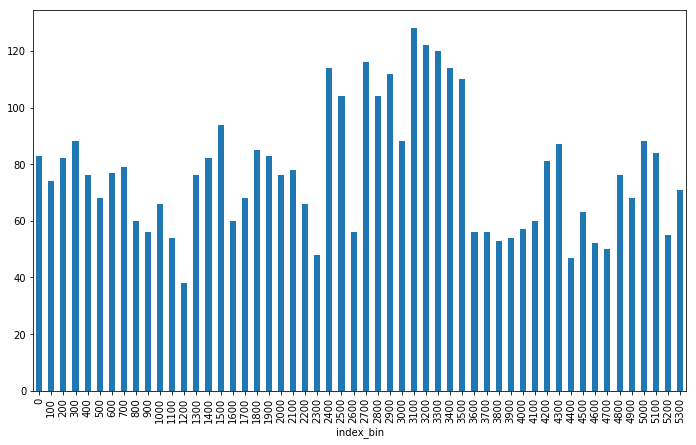

In [469]:
LSTM_B50_2_65k_p_grouped100.plot.bar()
plt.show()

In [463]:
type(LSTM_B50_2_65k_p_grouped100_rep)

pandas.core.series.Series

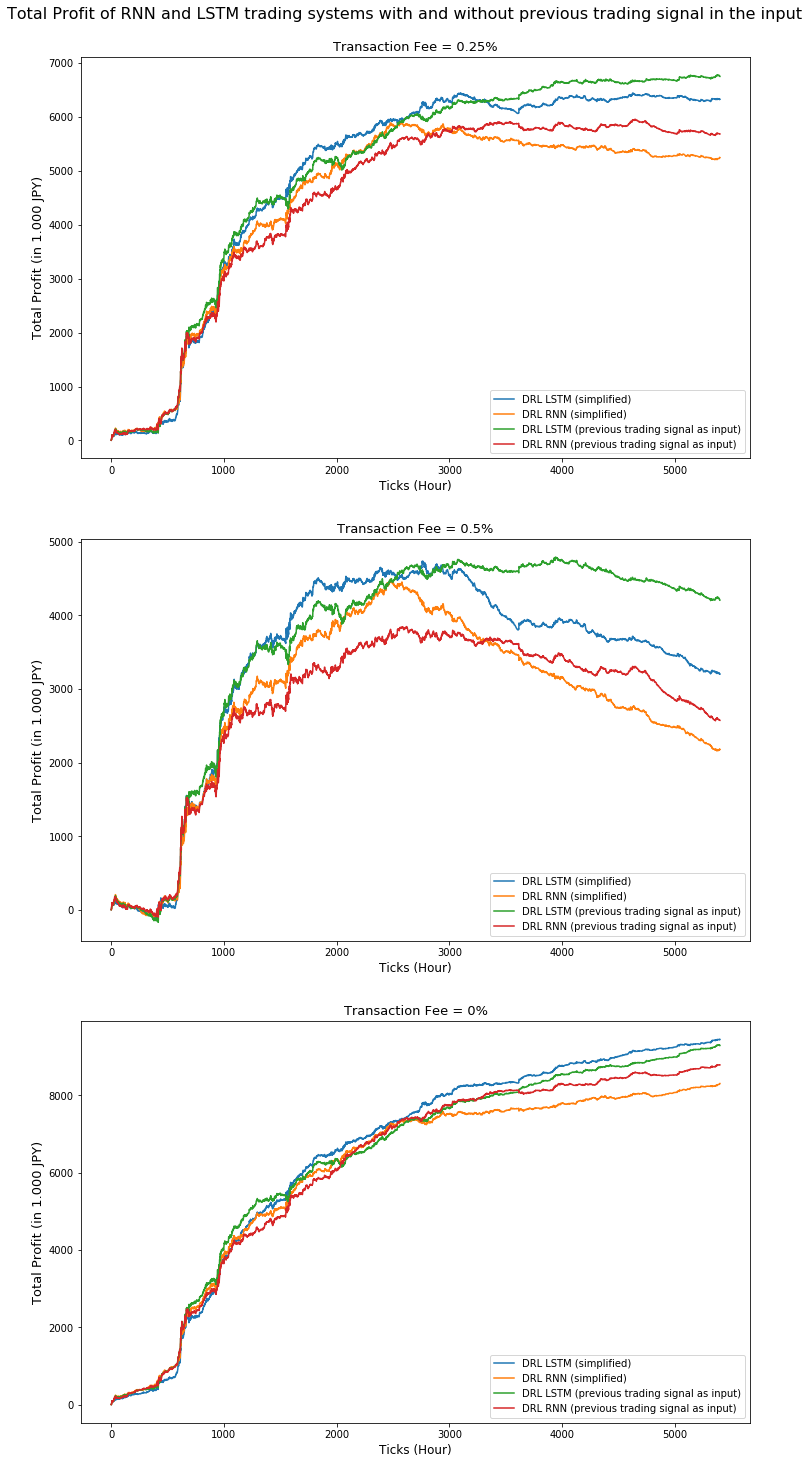

In [37]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,23  # figure size in inches

plt.clf()

fig, axs = plt.subplots(3, 1)

Z = 1

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z)

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z)

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p = profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z)


SHOP_LSTM_B50_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_LSTM_B50_FEE20_68k"]], THRESHOLD = 0.33)
SHOP_LSTM_B50_FEE20_68k_p = profit_from_result_df(SHOP_LSTM_B50_FEE20_68k_a, fee = FEE*Z)

SHOP_RNN_B50_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_RNN_B50_FEE20_60k"]], THRESHOLD = 0.33)
SHOP_RNN_B50_FEE20_60k_p = profit_from_result_df(SHOP_RNN_B50_FEE20_60k_a, fee = FEE*Z)


# plt.plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (20 Neurons)')
# plt.plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (40 Neurons)')
axs[0].plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (simplified)')
axs[0].plot(RNN_B50_2_60k_p['profit_cum_rescale_1k'] , label = 'DRL RNN (simplified)')
axs[0].plot(SHOP_LSTM_B50_FEE20_68k_p['profit_cum_rescale_1k'] , label = 'DRL LSTM (previous trading signal as input)')
axs[0].plot(SHOP_RNN_B50_FEE20_60k_p['profit_cum_rescale_1k'] , label = 'DRL RNN (previous trading signal as input)')
axs[0].set_xlabel("Ticks (Hour)", size = 12)
axs[0].set_ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("Transaction Fee = 0.25%", size = 13)
axs[0].legend(loc = 4)



fig.suptitle('Total Profit of RNN and LSTM trading systems with and without previous trading signal in the input',
             fontsize=16)


Z = 2

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z)

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z)



LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p_2 = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p_2 = profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z)


SHOP_LSTM_B50_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_LSTM_B50_FEE20_68k"]], THRESHOLD = 0.33)
SHOP_LSTM_B50_FEE20_68k_p_2 = profit_from_result_df(SHOP_LSTM_B50_FEE20_68k_a, fee = FEE*Z)

SHOP_RNN_B50_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_RNN_B50_FEE20_60k"]], THRESHOLD = 0.33)
SHOP_RNN_B50_FEE20_60k_p_2 = profit_from_result_df(SHOP_RNN_B50_FEE20_60k_a, fee = FEE*Z)


# plt.plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (20 Neurons)')
# plt.plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (40 Neurons)')
axs[1].plot(LSTM_B50_2_65k_p_2['profit_cum_rescale_1k'] , label = 'DRL LSTM (simplified)')
axs[1].plot(RNN_B50_2_60k_p_2['profit_cum_rescale_1k'] , label = 'DRL RNN (simplified)')
axs[1].plot(SHOP_LSTM_B50_FEE20_68k_p_2['profit_cum_rescale_1k'] , label = 'DRL LSTM (previous trading signal as input)')
axs[1].plot(SHOP_RNN_B50_FEE20_60k_p_2['profit_cum_rescale_1k'] , label = 'DRL RNN (previous trading signal as input)')
axs[1].set_xlabel("Ticks (Hour)", size = 12)
axs[1].set_ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[1].set_title("Transaction Fee = 0.5%", size = 13)
axs[1].legend(loc = 4)





Z = 0

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p_0 = profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z)

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p_0 = profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z)

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p_0 = profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z)

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p_0 = profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z)


SHOP_LSTM_B50_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_LSTM_B50_FEE20_68k"]], THRESHOLD = 0.33)
SHOP_LSTM_B50_FEE20_68k_p_0 = profit_from_result_df(SHOP_LSTM_B50_FEE20_68k_a, fee = FEE*Z)

SHOP_RNN_B50_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "SHOP_RNN_B50_FEE20_60k"]], THRESHOLD = 0.33)
SHOP_RNN_B50_FEE20_60k_p_0 = profit_from_result_df(SHOP_RNN_B50_FEE20_60k_a, fee = FEE*Z)


# plt.plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (20 Neurons)')
# plt.plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL Stacked LSTM (40 Neurons)')
axs[2].plot(LSTM_B50_2_65k_p_0['profit_cum_rescale_1k'] , label = 'DRL LSTM (simplified)')
axs[2].plot(RNN_B50_2_60k_p_0['profit_cum_rescale_1k'] , label = 'DRL RNN (simplified)')
axs[2].plot(SHOP_LSTM_B50_FEE20_68k_p_0['profit_cum_rescale_1k'] , label = 'DRL LSTM (previous trading signal as input)')
axs[2].plot(SHOP_RNN_B50_FEE20_60k_p_0['profit_cum_rescale_1k'] , label = 'DRL RNN (previous trading signal as input)')
axs[2].set_xlabel("Ticks (Hour)", size = 12)
axs[2].set_ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[2].set_title("Transaction Fee = 0%", size = 13)
axs[2].legend(loc = 4)


fig.subplots_adjust(hspace = 0.2, top = 0.95)
plt.show()



In [566]:
SHOP_RNN_B50_FEE20_60k_p.head()

,price,result,action,action_diff,profit_rescale,profit_cum_rescale,profit_rescale_1k,profit_cum_rescale_1k,action_diff_cumsum
0,-6868.468838,-0.999917,-1,1.0,6118.468838,6118.468838,6.118469,6.118469,1.0
1,-2911.851654,-0.999992,-1,0.0,2911.851654,9030.320492,2.911852,9.030320,1.0
2,-4190.890500,-0.999661,-1,0.0,4190.890500,13221.210992,4.190891,13.221211,1.0
3,-4259.705280,-0.998297,-1,0.0,4259.705280,17480.916272,4.259705,17.480916,1.0
4,-15201.223288,-0.927466,-1,0.0,15201.223288,32682.139561,15.201223,32.682140,1.0


# Avg profit per trade

In [8]:
# Avg Profit per Trade

def avg_profit_per_hour(ABC_p): 
    return ABC_p["profit_rescale"].mean()

avg_profit_per_trade(SHOP_RNN_B50_FEE20_60k_p)

NameError: name 'SHOP_RNN_B50_FEE20_60k_p' is not defined

In [570]:
SHOP_RNN_B50_FEE20_60k_p["action_diff_cumsum"] = SHOP_RNN_B50_FEE20_60k_p["action_diff"].cumsum()
SHOP_RNN_B50_FEE20_60k_p_trade =  SHOP_RNN_B50_FEE20_60k_p.groupby("action_diff_cumsum", as_index = False )["profit_rescale"].sum()
Avg_Profit_Per_Trade = SHOP_RNN_B50_FEE20_60k_p_trade.profit_rescale.mean()


2304.8104706022673

In [7]:
def avg_profit_per_trade(ABC_p): 
    ABC_p["action_diff_cumsum"] = ABC_p["action_diff"].cumsum()
    ABC_p_trade =  ABC_p.groupby("action_diff_cumsum", as_index = False )["profit_rescale"].sum()
    Avg_Profit_Per_Trade = ABC_p_trade.profit_rescale.mean()
    return Avg_Profit_Per_Trade

In [9]:
def total_profit_tradewise(ABC_p): 
    ABC_p["action_diff_cumsum"] = ABC_p["action_diff"].cumsum()
    ABC_p_trade =  ABC_p.groupby("action_diff_cumsum", as_index = False )["profit_rescale"].sum()
    ABC_p2 = ABC_p.merge(ABC_p_trade, on = "action_diff_cumsum", how = "left")
    ABC_p2["profit_rescale_y_cumsum"] = ABC_p2["profit_rescale_y"].cumsum()
    ABC_p2["profit_rescale_y_cumsum_1k"] = ABC_p2["profit_rescale_y_cumsum"]/1000 
    return ABC_p2

In [580]:
SHOP_RNN_B50_FEE20_60k_p2 = SHOP_RNN_B50_FEE20_60k_p.merge(SHOP_RNN_B50_FEE20_60k_p_trade, on = "action_diff_cumsum", how = "left")

In [581]:
SHOP_RNN_B50_FEE20_60k_p2["profit_rescale_y_cumsum"] = SHOP_RNN_B50_FEE20_60k_p2["profit_rescale_y"].cumsum()

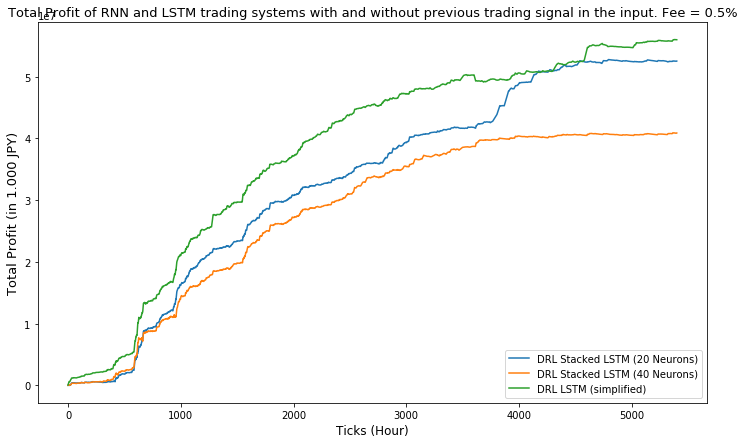

In [38]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,7  # figure size in inches

plt.clf()


Z = 1

plt.plot(total_profit_tradewise(LSTM_B50_Stacked_N20_70k_p)["profit_rescale_y_cumsum"], label = 'DRL Stacked LSTM (20 Neurons)')
plt.plot(total_profit_tradewise(LSTM_B50_Stacked_N40_55k_p)["profit_rescale_y_cumsum"] , label = 'DRL Stacked LSTM (40 Neurons)')
plt.plot(total_profit_tradewise(SHOP_RNN_B50_FEE20_60k_p)["profit_rescale_y_cumsum"], label = 'DRL LSTM (simplified)')
# plt.plot(RNN_B50_2_60k_p_2['profit_cum_rescale_1k'] , label = 'DRL RNN (simplified)')
# plt.plot(SHOP_LSTM_B50_FEE20_68k_p_2['profit_cum_rescale_1k'] , label = 'DRL LSTM (previous trading signal as input)')
# plt.plot(SHOP_RNN_B50_FEE20_60k_p_2['profit_cum_rescale_1k'] , label = 'DRL RNN (previous trading signal as input)')
plt.xlabel("Ticks (Hour)", size = 12)
plt.ylabel("Total Profit (in 1.000 JPY)", size = 13)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
plt.title("Total Profit of RNN and LSTM trading systems with and without previous trading signal in the input. Fee = 0.5%", size = 13)
plt.legend(loc = 4)
plt.show()

In [572]:
Total_Trades = SHOP_RNN_B50_FEE20_60k_p["action_diff"].astype(bool).sum(axis=0)
Total_Trades

2466

In [577]:
Profitable_Trades = SHOP_RNN_B50_FEE20_60k_p_trade[SHOP_RNN_B50_FEE20_60k_p_trade.profit_rescale>0].count()[1]

In [578]:
Profitable_Rate = Profitable_Trades/Total_Trades

# Avg profit per day

In [10]:
# Avg Profit per Day

def avg_profit_per_day(DF_p, bins = 24):
    DF_p = DF_p.reset_index()
    DF_p["index_bin"] = (round(np.floor(DF_p["index"].astype(float)/bins))*bins).astype(int)
    grouped100 = DF_p.groupby("index_bin").profit_rescale.sum()
    #grouped100_rep = grouped100.i.loc[np.arange(len(grouped100)).repeat(bins)]
    return grouped100.mean()

In [11]:
# Avg Profit per Week

def avg_profit_per_week(DF_p, bins = 24*7):
    DF_p = DF_p.reset_index()
    DF_p["index_bin"] = (round(np.floor(DF_p["index"].astype(float)/bins))*bins).astype(int)
    grouped100 = DF_p.groupby("index_bin").profit_rescale.sum()
    #grouped100_rep = grouped100.i.loc[np.arange(len(grouped100)).repeat(bins)]
    return grouped100.mean()

In [12]:
# Avg Profit per month

def avg_profit_per_month(DF_p, bins = 24*7*30.5):
    DF_p = DF_p.reset_index()
    DF_p["index_bin"] = (round(np.floor(DF_p["index"].astype(float)/bins))*bins).astype(int)
    grouped100 = DF_p.groupby("index_bin").profit_rescale.sum()
    #grouped100_rep = grouped100.i.loc[np.arange(len(grouped100)).repeat(bins)]
    return grouped100.mean()

In [564]:
avg_profit_per_week(SHOP_RNN_B50_FEE20_60k_p)

172232.20062136935

In [13]:
# Number of trades

# Avg Profit per month

def avg_profit_per_month(DF_p, bins = 24*7*30.5):
    DF_p = DF_p.reset_index()
    DF_p["index_bin"] = (round(np.floor(DF_p["index"].astype(float)/bins))*bins).astype(int)
    grouped100 = DF_p.groupby("index_bin").profit_rescale.sum()
    #grouped100_rep = grouped100.i.loc[np.arange(len(grouped100)).repeat(bins)]
    return grouped100.mean()

In [39]:
RECURRENT_LSTM_B50_REAL_FEE20_68k = pd.read_csv('20190104-yhat_test_lstm_rl_50_batch_recurrentshop_FULL_60neurons.csv', header=None)

RECURRENT_RNN_B50_REAL_FEE20_60k = pd.read_csv('20190104-yhat_test_rnn_rl_50_batch_recurrentshop_FULL_60neurons.csv', header=None)

RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k = pd.read_csv('20190107-yhat_test_lstm_rl_50_batch_recurrentshop_Sharpe_FULL_60neurons.csv', header=None)

RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k = pd.read_csv('20190107-yhat_test_lstm_rl_50_batch_recurrentshop_Dempster025_FULL_60neurons.csv', header=None)

RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k = pd.read_csv('20190108-yhat_test_lstm_rl_50_batch_recurrentshop_Dempster075_FULL_60neurons.csv', header=None)

RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_59k = pd.read_csv("20190107-yhat_test_lstm_rl_50_batch_recurrentshop_Stacked_adv_FULL_20neurons_TCs20xsmaller.csv", header=None)

In [55]:
list(RS)

['PRICE_DIFF',
 'LSTM_B50_1_60k',
 'LSTM_B50_2_65k',
 'LSTM_B50_3_75k',
 'LSTM_B50_Sharpe_14k',
 'LSTM_B50_Dempster_55k',
 'LSTM_B50_no_fees_1_70k',
 'LSTM_B50_no_fees_2_65k',
 'RNN_B50_1_70k',
 'RNN_B50_2_60k',
 'LSTM_B50_Stacked_N10_70k',
 'LSTM_B50_Stacked_N20_70k',
 'LSTM_B50_Stacked_N40_55k',
 'SL_LSTM_B50_N30_50k',
 'SL_RNN_B50_N30',
 'SHOP_LSTM_B50_FEE20_68k',
 'SHOP_RNN_B50_FEE20_60k',
 'RECURRENT_LSTM_B50_REAL_FEE20_68k',
 'RECURRENT_RNN_B50_REAL_FEE20_60k',
 'RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k',
 'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_1_59k',
 'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k']

In [41]:
RECURRENT_LSTM_B50_REAL_FEE20_68k = RECURRENT_LSTM_B50_REAL_FEE20_68k.rename(columns={ 1: "RECURRENT_LSTM_B50_REAL_FEE20_68k"})

In [43]:
RECURRENT_RNN_B50_REAL_FEE20_60k = RECURRENT_RNN_B50_REAL_FEE20_60k.rename(columns={ 1: "RECURRENT_RNN_B50_REAL_FEE20_60k"})
RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k = RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k.rename(columns={ 1: "RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k"})
RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k = RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k.rename(columns={ 1: "RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k"})
RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k = RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k.rename(columns={ 1: "RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k"})
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_59k = RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_59k.rename(columns={ 1: "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_59k"})


In [46]:
RS = pd.concat([RS,
RECURRENT_LSTM_B50_REAL_FEE20_68k["RECURRENT_LSTM_B50_REAL_FEE20_68k"],
RECURRENT_RNN_B50_REAL_FEE20_60k["RECURRENT_RNN_B50_REAL_FEE20_60k"],
RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k["RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k"],
RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k["RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k"],
RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k["RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k"],
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_59k["RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_59k"]
], axis = 1)


In [49]:
RS = RS.rename(columns={ "RECURRENT_LSTM_B50_REAL_Stacked_adv_1_N20_59k": "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_1_59k"})


In [52]:
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k = pd.read_csv("20190110-yhat_test_lstm_rl_50_batch_recurrentshop_Stacked_adv_FULL_20neurons_TCs20xsmaller_v2.csv", header=None)

In [53]:
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k = RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k.rename(columns={ 1: "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"})


In [54]:
RS = pd.concat([RS,
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k["RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]
], axis = 1)


In [60]:
RS.shape

(5400, 24)

In [59]:
RS = RS[:5400]

In [61]:
RS.to_csv("20190111_RS_with_Rucurrentshop", sep=",")

In [11]:
def total_profit_tradewise(ABC_p): 
    ABC_p["action_diff_cumsum"] = ABC_p["action_diff"].cumsum()
    ABC_p_trade =  ABC_p.groupby("action_diff_cumsum", as_index = False )["profit_rescale"].agg(
                                                        {"Trade_profit": "sum", "Trade_duration": "count"})
    ABC_p2 = ABC_p.merge(ABC_p_trade, on = "action_diff_cumsum", how = "left")
    ABC_p2["Trade_profit"][ABC_p2.action_diff==0] = 0
    ABC_p2["profit_rescale_trade_cumsum"] = ABC_p2["Trade_profit"].cumsum()
    ABC_p2["profit_rescale_trade_cumsum_1k"] = ABC_p2["profit_rescale_trade_cumsum"]/1000
    ABC_p2["profit_rescale_trade"] = ABC_p2["Trade_profit"]
    ABC_p2["profit_rescale_trade_1k"] = ABC_p2["profit_rescale_trade"]/1000 	
    return ABC_p2



def number_of_trades(ABC_p):
    Trades_No = ABC_p[ABC_p.action_diff !=0].shape[0] # Only if trade took place
    Trades_No = ABC_p.action_diff.sum() # From short to long - count as two trades
    return Trades_No

def sharpe_ratio_trade(ABC_p):
    ABC_ps = total_profit_tradewise(ABC_p)
    ABC_ps = ABC_ps[ABC_ps.action_diff !=0] # Only if trade took place
    Sharpe_Ratio = ABC_ps.profit_rescale_trade.mean()/ABC_ps.profit_rescale_trade.std()
    return Sharpe_Ratio

def downside_deviation(ABC_p, Min_Profit = 0):
    ABC_ps = total_profit_tradewise(ABC_p)
    ABC_ps = ABC_ps[ABC_ps.action_diff !=0] # Only if trade took place
    Downside_Dev = ABC_ps.profit_rescale_trade.apply(lambda x: min(x - Min_Profit, 0)).std()
    return Downside_Dev

def volatility(ABC_p):
    ABC_ps = total_profit_tradewise(ABC_p)
    ABC_ps = ABC_ps[ABC_ps.action_diff !=0] # Only if trade took place
    Vol = ABC_ps.profit_rescale_trade.std()
    return Vol

def avg_profit_per_trade(ABC_p):
    ABC_ps = total_profit_tradewise(ABC_p)
    ABC_ps = ABC_ps[ABC_ps.action_diff !=0] # Only if trade took place
    Avg_Profit = ABC_ps.profit_rescale_trade.mean()
    return Avg_Profit

def avg_holding_time_h(ABC_p):
    ABC_ps = total_profit_tradewise(ABC_p)
    ABC_ps = ABC_ps[ABC_ps.action_diff !=0]
    Avg_Duration = ABC_ps.Trade_duration.mean()
    return Avg_Duration

In [99]:
# total_profit_tradewise(SHOP_RNN_B50_FEE20_60k_p)

In [107]:
RS = RS.drop([ 'SHOP_LSTM_B50_FEE20_68k', 'SHOP_RNN_B50_FEE20_60k'], axis = 1)

In [3]:
RS.head()

NameError: name 'RS' is not defined

In [18]:
import matplotlib.style as style
style.use('fivethirtyeight')
#style.use('seaborn-poster')
style.use(['fivethirtyeight', 'seaborn-poster'])

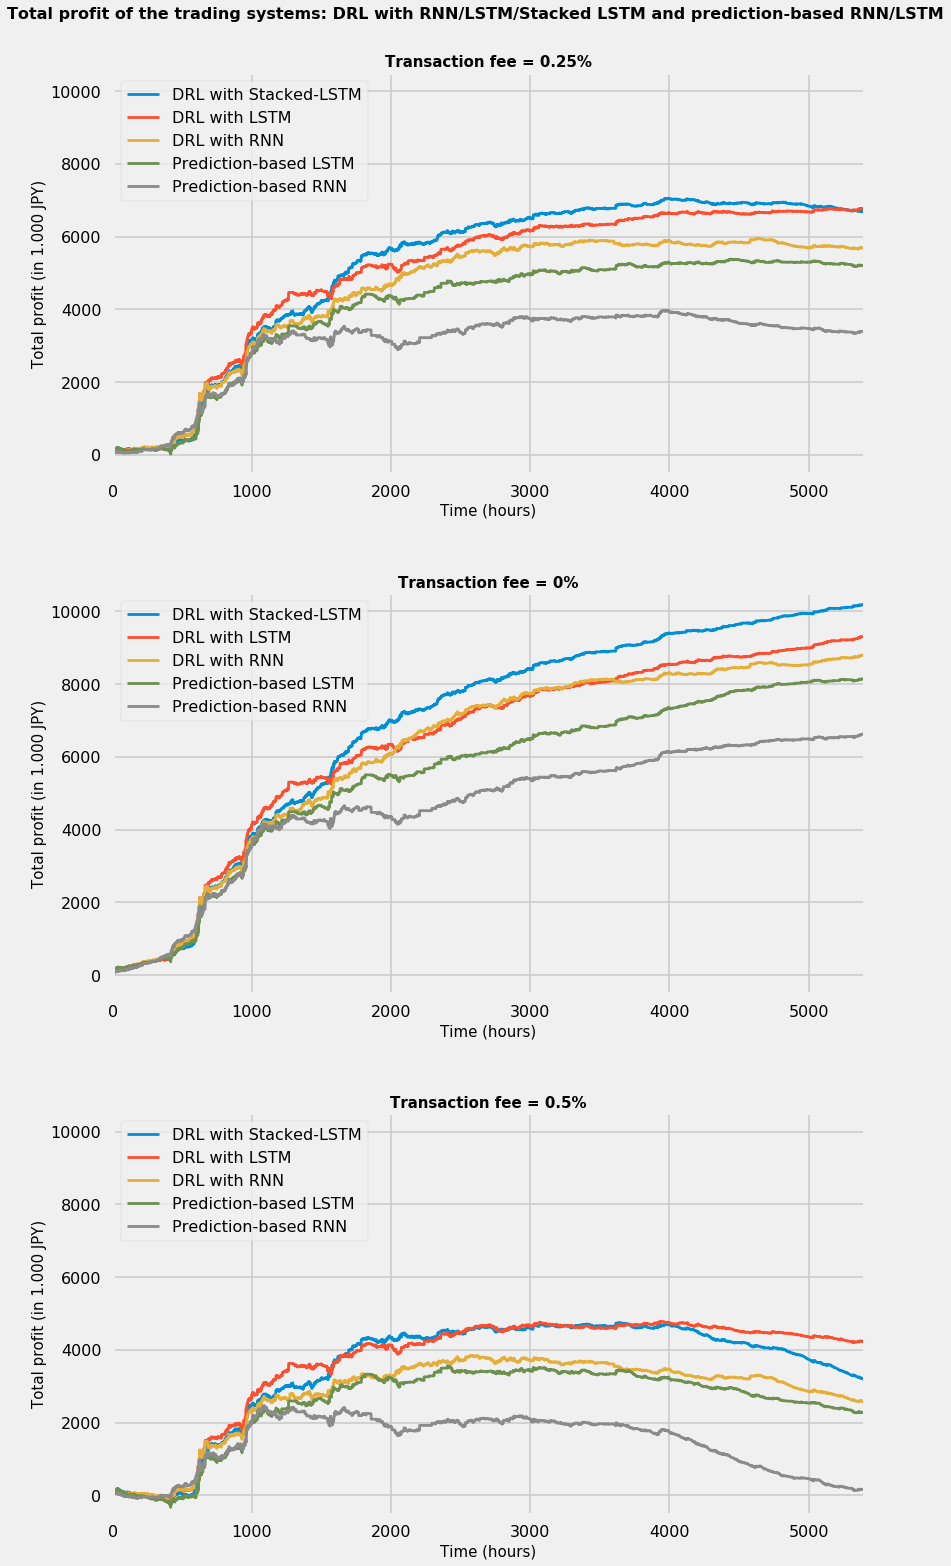

In [43]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,23  # figure size in inches

plt.clf()

fig, axs = plt.subplots(3, 1)


Z = 1

RECURRENT_RNN_B50_REAL_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_RNN_B50_REAL_FEE20_60k"]],
                                                            THRESHOLD = 0.33)
RECURRENT_RNN_B50_REAL_FEE20_60k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_RNN_B50_REAL_FEE20_60k_a,
                                                                                  fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = \
    action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = \
    total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, fee = FEE*Z))

    
SL_LSTM_B50_N30_50k_a = action_from_results_df(RS[["PRICE_DIFF", "SL_LSTM_B50_N30_50k"]], THRESHOLD = 0.01)
SL_LSTM_B50_N30_50k_p = total_profit_tradewise(profit_from_result_df(SL_LSTM_B50_N30_50k_a, fee = FEE*Z))

SL_RNN_B50_N30_a = action_from_results_df(RS[["PRICE_DIFF", "SL_RNN_B50_N30"]], THRESHOLD = 0.01)
SL_RNN_B50_N30_p = total_profit_tradewise(profit_from_result_df(SL_RNN_B50_N30_a, fee = FEE*Z))


axs[0].plot(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with Stacked-LSTM')
axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM')
axs[0].plot(RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with RNN')

axs[0].plot(SL_LSTM_B50_N30_50k_p['profit_rescale_trade_cumsum_1k'] , label = 'Prediction-based LSTM')
axs[0].plot(SL_RNN_B50_N30_p['profit_rescale_trade_cumsum_1k'] , label = 'Prediction-based RNN')

axs[0].set_xlim([0,5400])
axs[0].set_ylim([-500,10500])
axs[0].set_xlabel("Time (hours)", size = 15)
axs[0].set_ylabel("Total profit (in 1.000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("Transaction fee = 0.25%", size = 15, fontweight='bold')
axs[0].legend(loc = 2)


fig.suptitle('Total profit of the trading systems: DRL with RNN/LSTM/Stacked LSTM and prediction-based RNN/LSTM',
             fontsize=16,  fontweight='bold')



Z = 0

RECURRENT_RNN_B50_REAL_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_RNN_B50_REAL_FEE20_60k"]], THRESHOLD = 0.33)
RECURRENT_RNN_B50_REAL_FEE20_60k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_RNN_B50_REAL_FEE20_60k_a,
                                                                                  fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = \
    action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = \
    total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, fee = FEE*Z))

    
SL_LSTM_B50_N30_50k_a = action_from_results_df(RS[["PRICE_DIFF", "SL_LSTM_B50_N30_50k"]], THRESHOLD = 0.01)
SL_LSTM_B50_N30_50k_p = total_profit_tradewise(profit_from_result_df(SL_LSTM_B50_N30_50k_a, fee = FEE*Z))

SL_RNN_B50_N30_a = action_from_results_df(RS[["PRICE_DIFF", "SL_RNN_B50_N30"]], THRESHOLD = 0.01)
SL_RNN_B50_N30_p = total_profit_tradewise(profit_from_result_df(SL_RNN_B50_N30_a, fee = FEE*Z))


axs[1].plot(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with Stacked-LSTM')
axs[1].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM')
axs[1].plot(RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with RNN')

axs[1].plot(SL_LSTM_B50_N30_50k_p['profit_rescale_trade_cumsum_1k'] , label = 'Prediction-based LSTM')
axs[1].plot(SL_RNN_B50_N30_p['profit_rescale_trade_cumsum_1k'] , label = 'Prediction-based RNN')
axs[1].set_xlim([0,5400])
axs[1].set_ylim([-500,10500])
axs[1].set_xlabel("Time (hours)", size = 15)
axs[1].set_ylabel("Total profit (in 1.000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[1].set_title("Transaction fee = 0%", size = 15, fontweight='bold')
axs[1].legend(loc = 2)




Z = 2

RECURRENT_RNN_B50_REAL_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_RNN_B50_REAL_FEE20_60k"]], THRESHOLD = 0.33)
RECURRENT_RNN_B50_REAL_FEE20_60k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_RNN_B50_REAL_FEE20_60k_a,
                                                                                  fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = \
    action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = \
    total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, fee = FEE*Z))

    
SL_LSTM_B50_N30_50k_a = action_from_results_df(RS[["PRICE_DIFF", "SL_LSTM_B50_N30_50k"]], THRESHOLD = 0.01)
SL_LSTM_B50_N30_50k_p = total_profit_tradewise(profit_from_result_df(SL_LSTM_B50_N30_50k_a, fee = FEE*Z))

SL_RNN_B50_N30_a = action_from_results_df(RS[["PRICE_DIFF", "SL_RNN_B50_N30"]], THRESHOLD = 0.01)
SL_RNN_B50_N30_p = total_profit_tradewise(profit_from_result_df(SL_RNN_B50_N30_a, fee = FEE*Z))


axs[2].plot(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with Stacked-LSTM')
axs[2].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM')
axs[2].plot(RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with RNN')

axs[2].plot(SL_LSTM_B50_N30_50k_p['profit_rescale_trade_cumsum_1k'] , label = 'Prediction-based LSTM')
axs[2].plot(SL_RNN_B50_N30_p['profit_rescale_trade_cumsum_1k'] , label = 'Prediction-based RNN')
axs[2].set_xlim([0,5400])
axs[2].set_ylim([-500,10500])
axs[2].set_xlabel("Time (hours)", size = 15)
axs[2].set_ylabel("Total profit (in 1.000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[2].set_title("Transaction fee = 0.5%", size = 15,  fontweight='bold')
axs[2].legend(loc = 2)

fig.subplots_adjust(hspace = 0.3, top = 0.94)
plt.show()


In [135]:
RS.head()

,PRICE_DIFF,LSTM_B50_1_60k,LSTM_B50_2_65k,LSTM_B50_3_75k,LSTM_B50_Sharpe_14k,LSTM_B50_Dempster_55k,LSTM_B50_no_fees_1_70k,LSTM_B50_no_fees_2_65k,RNN_B50_1_70k,RNN_B50_2_60k,...,LSTM_B50_Stacked_N40_55k,SL_LSTM_B50_N30_50k,SL_RNN_B50_N30,RECURRENT_LSTM_B50_REAL_FEE20_68k,RECURRENT_RNN_B50_REAL_FEE20_60k,RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k,RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k,RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k,RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_1_59k,RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k
0,-6868.468838,-0.999998,-0.999999,-1.000000,-0.323079,-1.000000,-0.991343,-1.0,-0.998006,-0.999995,...,-0.999999,-0.286915,-0.317432,-1.00000,-0.999917,-0.259321,-0.999969,-0.999771,-0.987654,-0.999749
1,-2911.851654,-1.000000,-1.000000,-1.000000,-0.273212,-1.000000,-0.999971,-1.0,-1.000000,-0.999955,...,-1.000000,-0.287075,-0.127983,-1.00000,-0.999992,-0.247985,-0.999998,-0.999999,-0.944405,-0.999873
2,-4190.890500,-0.998509,-0.999987,-1.000000,-0.089578,-0.999806,-0.970595,-1.0,-0.999995,-0.980595,...,-1.000000,-0.110119,0.062139,-0.99936,-0.999661,-0.075585,-0.999512,-0.979069,-0.918732,-0.999456
3,-4259.705280,-0.999999,-1.000000,-1.000000,-0.115440,-1.000000,-0.999168,-1.0,-0.997671,-0.871905,...,0.955433,-0.180262,-0.400177,-1.00000,-0.998297,-0.078273,-0.999996,-0.999973,-0.960732,-0.998452
4,-15201.223288,-0.999591,-0.999956,-0.999999,-0.048761,-0.999932,-0.997484,-1.0,-0.999812,-0.976742,...,-1.000000,-0.157951,0.003210,-0.99805,-0.927466,-0.053408,-0.999949,-0.999873,-0.961690,-0.995406


In [147]:
total_profit_tradewise(RECURRENT_RNN_B50_REAL_FEE20_60k_p).head(10)

,price,result,action,action_diff,profit_rescale,profit_cum_rescale,profit_rescale_1k,profit_cum_rescale_1k,action_diff_cumsum,Trade_profit,Trade_duration,profit_rescale_trade_cumsum,profit_rescale_trade_cumsum_1k,profit_rescale_trade,profit_rescale_trade_1k
0,-6868.468838,-0.999917,-1,1.0,5368.468838,5368.468838,5.368469,5.368469,1.0,61879.659400,9,61879.659400,61.879659,61879.659400,61.879659
1,-2911.851654,-0.999992,-1,0.0,2911.851654,8280.320492,2.911852,8.280320,1.0,61879.659400,9,123759.318800,123.759319,61879.659400,61.879659
2,-4190.890500,-0.999661,-1,0.0,4190.890500,12471.210992,4.190891,12.471211,1.0,61879.659400,9,185638.978200,185.638978,61879.659400,61.879659
3,-4259.705280,-0.998297,-1,0.0,4259.705280,16730.916272,4.259705,16.730916,1.0,61879.659400,9,247518.637600,247.518638,61879.659400,61.879659
4,-15201.223288,-0.927466,-1,0.0,15201.223288,31932.139561,15.201223,31.932140,1.0,61879.659400,9,309398.297000,309.398297,61879.659400,61.879659
5,-5218.344821,-1.000000,-1,0.0,5218.344821,37150.484381,5.218345,37.150484,1.0,61879.659400,9,371277.956400,371.277956,61879.659400,61.879659
6,-32332.893917,-0.993331,-1,0.0,32332.893917,69483.378298,32.332894,69.483378,1.0,61879.659400,9,433157.615800,433.157616,61879.659400,61.879659
7,-26293.837393,-1.000000,-1,0.0,26293.837393,95777.215691,26.293837,95.777216,1.0,61879.659400,9,495037.275200,495.037275,61879.659400,61.879659
8,33897.556291,-1.000000,-1,0.0,-33897.556291,61879.659400,-33.897556,61.879659,1.0,61879.659400,9,556916.934600,556.916935,61879.659400,61.879659
9,42057.416954,1.000000,1,2.0,39057.416954,100937.076354,39.057417,100.937076,3.0,22531.099891,2,579448.034491,579.448034,22531.099891,22.531100


# Add RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k and RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt

In [84]:
RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt = pd.read_csv('20190112-yhat_test_lstm_rl_50_batch_recurrentshop_Sharpe_sqrt.csv', header=None)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k = pd.read_csv('20190113_yhat_FULL_Multi_Utility.csv', header=None)

RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt = RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt.rename(columns={ 1: "RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"})
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k = RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k.rename(columns={ 1: "RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k"})

In [159]:
RS = pd.concat([RS,
RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt["RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"],
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k["RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k"]
], axis = 1)

In [46]:
RS = pd.concat([RS,
# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt["RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"],
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k["RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k"]
], axis = 1)

In [85]:
RS = pd.concat([RS,
 RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt["RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"]
], axis = 1)

In [86]:
RS.shape

(5430, 26)

In [87]:
RS = RS[:5400]

In [88]:
list(RS)

['PRICE_DIFF',
 'LSTM_B50_1_60k',
 'LSTM_B50_2_65k',
 'LSTM_B50_3_75k',
 'LSTM_B50_Sharpe_14k',
 'LSTM_B50_Dempster_55k',
 'LSTM_B50_no_fees_1_70k',
 'LSTM_B50_no_fees_2_65k',
 'RNN_B50_1_70k',
 'RNN_B50_2_60k',
 'LSTM_B50_Stacked_N10_70k',
 'LSTM_B50_Stacked_N20_70k',
 'LSTM_B50_Stacked_N40_55k',
 'SL_LSTM_B50_N30_50k',
 'SL_RNN_B50_N30',
 'SHOP_LSTM_B50_FEE20_68k',
 'SHOP_RNN_B50_FEE20_60k',
 'RECURRENT_LSTM_B50_REAL_FEE20_68k',
 'RECURRENT_RNN_B50_REAL_FEE20_60k',
 'RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k',
 'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_1_59k',
 'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt']

In [46]:
def trading_freq(DF_p, bins = 100):
    DF_p = DF_p.reset_index()
    DF_p["index_bin"] = (round(np.floor(DF_p["index"].astype(float)/bins))*bins).astype(int)
    grouped100 = DF_p.groupby("index_bin").action_diff.sum()
    grouped100_rep = grouped100.iloc[np.arange(len(grouped100)).repeat(bins)]
    return grouped100_rep

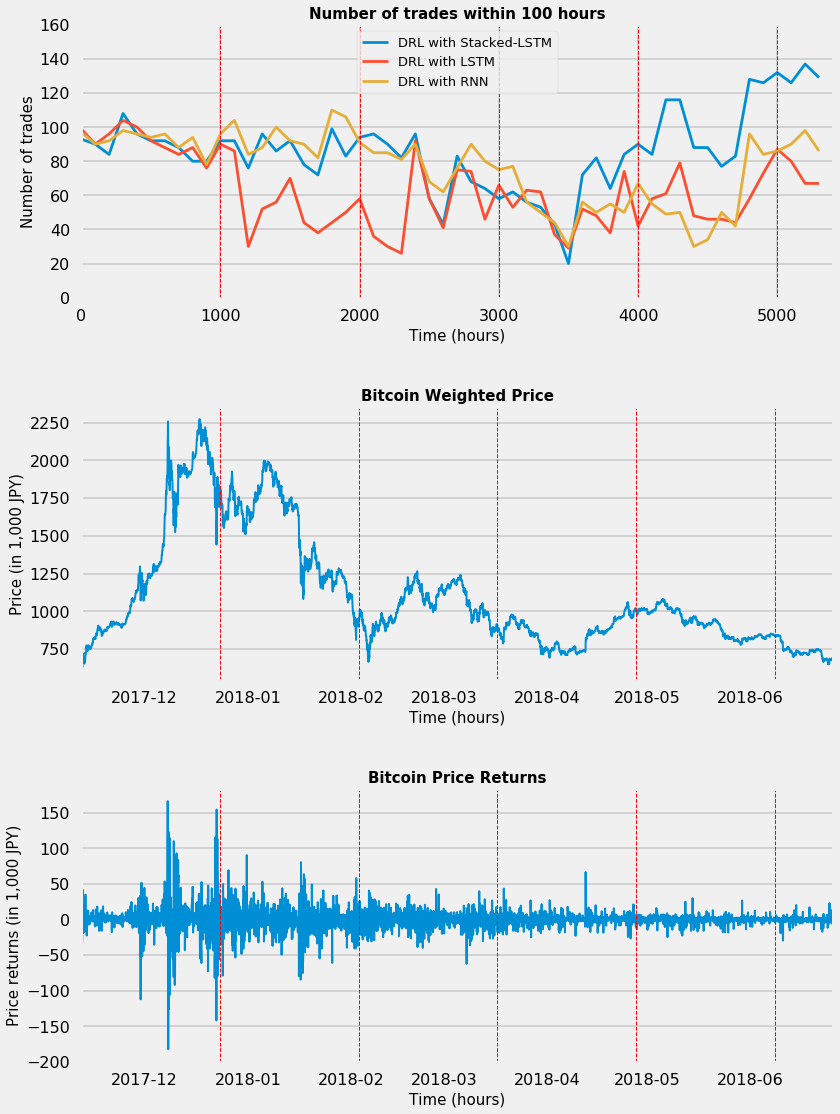

In [53]:
import datetime

#### from matplotlib import rcParams
rcParams['figure.figsize'] = 12,18  # figure size in inches
plt.clf()

Z = 1
RECURRENT_RNN_B50_REAL_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_RNN_B50_REAL_FEE20_60k"]],
                                                            THRESHOLD = 0.33)
RECURRENT_RNN_B50_REAL_FEE20_60k_p = (profit_from_result_df(RECURRENT_RNN_B50_REAL_FEE20_60k_a,
                                                                                  fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = (profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = \
    action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = \
    (profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, fee = FEE*Z))

    

fig, axs = plt.subplots(3, 1)

axs[0].plot(trading_freq(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p) , label = 'DRL with Stacked-LSTM', marker = '_')
axs[0].plot(trading_freq(RECURRENT_LSTM_B50_REAL_FEE20_68k_p) , label = 'DRL with LSTM', marker = '_')
axs[0].plot(trading_freq(RECURRENT_RNN_B50_REAL_FEE20_60k_p) , label = 'DRL with RNN', marker = '_')

axs[0].set_xlabel("Time (hours)", size = 15)
axs[0].set_ylabel("Number of trades", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("Number of trades within 100 hours", size = 15,  fontweight='bold')

axs[0].axvline(1000, color='r', linestyle='--', lw=1)
axs[0].axvline(2000, color='r', linestyle='--', lw=1)
axs[0].axvline(3000, color='r', linestyle='--', lw=1)
axs[0].axvline(4000, color='r', linestyle='--', lw=1)
axs[0].axvline(5000, color='r', linestyle='--', lw=1)
axs[0].set_ylim([0,160])
axs[0].set_xlim([0,5400])
axs[0].legend(loc = 9, prop={'size': 13})


axs[1].plot(Real_Price['Weighted_Price'][3000:]/1000, label = 'Bitcoin Weighted Price', linewidth=2)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[1].set_title("Bitcoin Weighted Price", size = 15,  fontweight='bold')
axs[1].set_xlabel("Time (hours)", size = 15)
axs[1].set_ylabel('Price (in 1,000 JPY)', size = 15)
axs[1].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[1].xaxis.grid(False)



axs[2].plot(Real_Price['Diff'][3000:]/1000, label = 'Bitcoin Price Returns', linewidth=2)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[2].set_title("Bitcoin Price Returns", size = 15,  fontweight='bold')
axs[2].set_xlabel("Time (hours)", size = 15)
axs[2].set_ylabel('Price returns (in 1,000 JPY)', size = 15)
axs[2].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[2].xaxis.grid(False)


fig.subplots_adjust(hspace = 0.4, top = 0.87)

plt.show()

In [37]:
min(Real_Price.index)

Timestamp('2017-07-04 09:00:00')

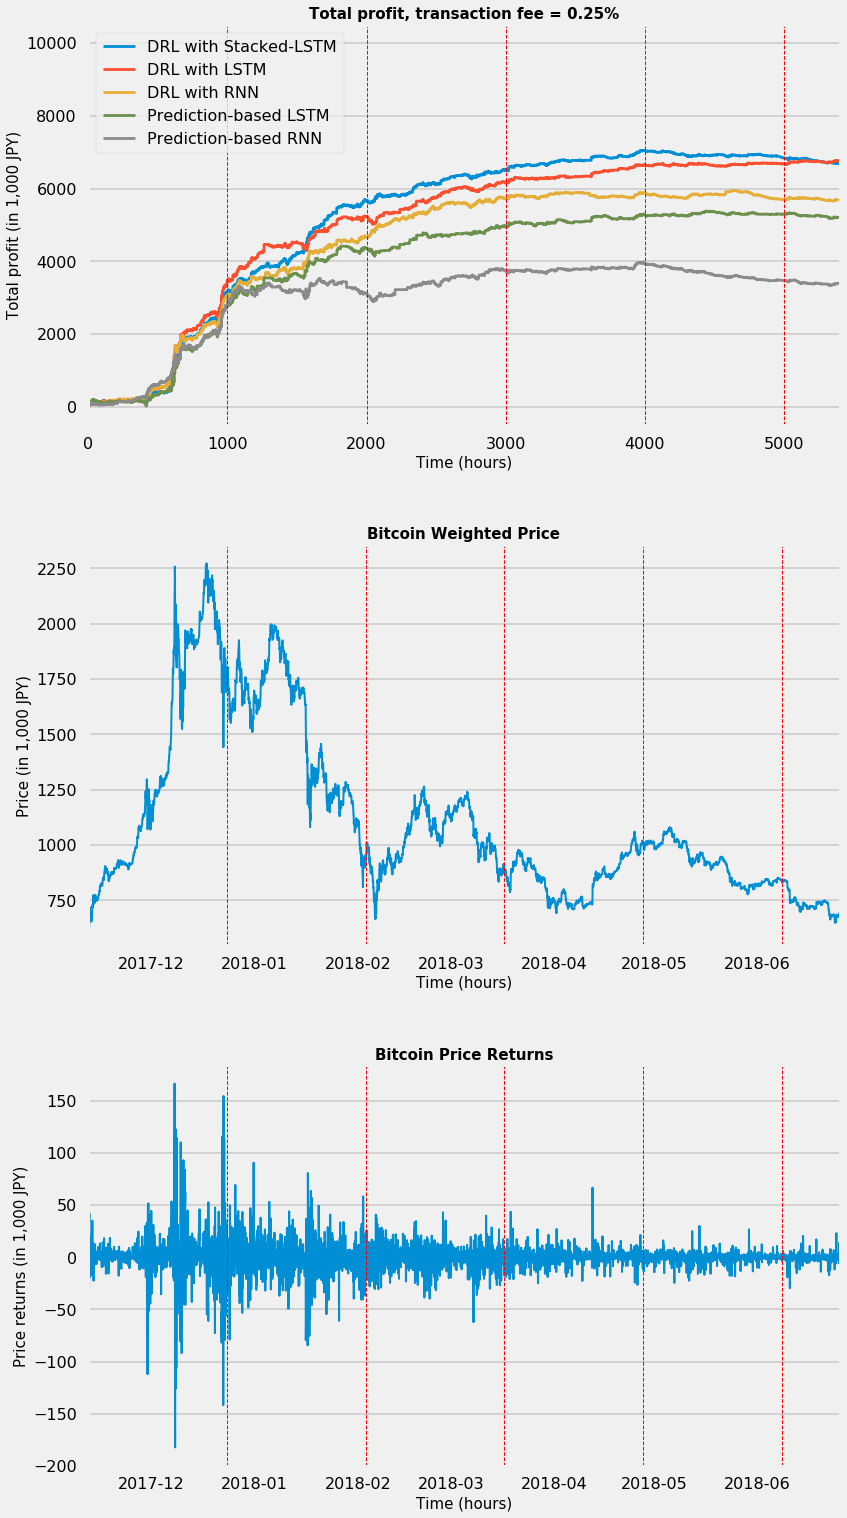

In [52]:
import datetime

#### from matplotlib import rcParams
rcParams['figure.figsize'] = 12,23  # figure size in inches
plt.clf()


fig, axs = plt.subplots(3, 1)


Z = 1

RECURRENT_RNN_B50_REAL_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_RNN_B50_REAL_FEE20_60k"]],
                                                            THRESHOLD = 0.33)
RECURRENT_RNN_B50_REAL_FEE20_60k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_RNN_B50_REAL_FEE20_60k_a,
                                                                                  fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = \
    action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = \
    total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, fee = FEE*Z))

    
SL_LSTM_B50_N30_50k_a = action_from_results_df(RS[["PRICE_DIFF", "SL_LSTM_B50_N30_50k"]], THRESHOLD = 0.01)
SL_LSTM_B50_N30_50k_p = total_profit_tradewise(profit_from_result_df(SL_LSTM_B50_N30_50k_a, fee = FEE*Z))

SL_RNN_B50_N30_a = action_from_results_df(RS[["PRICE_DIFF", "SL_RNN_B50_N30"]], THRESHOLD = 0.01)
SL_RNN_B50_N30_p = total_profit_tradewise(profit_from_result_df(SL_RNN_B50_N30_a, fee = FEE*Z))


axs[0].plot(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with Stacked-LSTM')
axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM')
axs[0].plot(RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with RNN')

axs[0].plot(SL_LSTM_B50_N30_50k_p['profit_rescale_trade_cumsum_1k'] , label = 'Prediction-based LSTM')
axs[0].plot(SL_RNN_B50_N30_p['profit_rescale_trade_cumsum_1k'] , label = 'Prediction-based RNN')
axs[0].set_xlim([0,5400])
axs[0].set_ylim([-500,10500])
axs[0].set_xlabel("Time (hours)", size = 15)
axs[0].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("Total profit, transaction fee = 0.25%", size = 15, fontweight='bold')
axs[0].legend(loc = 2)
axs[0].axvline(1000, color='r', linestyle='--', lw=1)
axs[0].axvline(2000, color='r', linestyle='--', lw=1)
axs[0].axvline(3000, color='r', linestyle='--', lw=1)
axs[0].axvline(4000, color='r', linestyle='--', lw=1)
axs[0].axvline(5000, color='r', linestyle='--', lw=1)
axs[0].xaxis.grid(False)
#fig.suptitle('Total Profit of the trading systems: DRL with RNN/LSTM/Stacked LSTM and Predicition-Based RNN/LSTM',
#             fontsize=16,  fontweight='bold')



axs[1].plot(Real_Price['Weighted_Price'][3000:]/1000, label = 'Bitcoin Weighted Price', linewidth=2)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[1].set_title("Bitcoin Weighted Price", size = 15,  fontweight='bold')
axs[1].set_xlabel("Time (hours)", size = 15)
axs[1].set_ylabel('Price (in 1,000 JPY)', size = 15)
axs[1].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[1].xaxis.grid(False)


axs[2].plot(Real_Price['Diff'][3000:]/1000, label = 'Bitcoin Price Returns', linewidth=2)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[2].set_title("Bitcoin Price Returns", size = 15,  fontweight='bold')
axs[2].set_xlabel("Time (hours)", size = 15)
axs[2].set_ylabel('Price returns (in 1,000 JPY)', size = 15)
axs[2].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[2].xaxis.grid(False)


fig.subplots_adjust(hspace = 0.3, top = 0.94)

plt.show()

In [41]:
# list(RS)

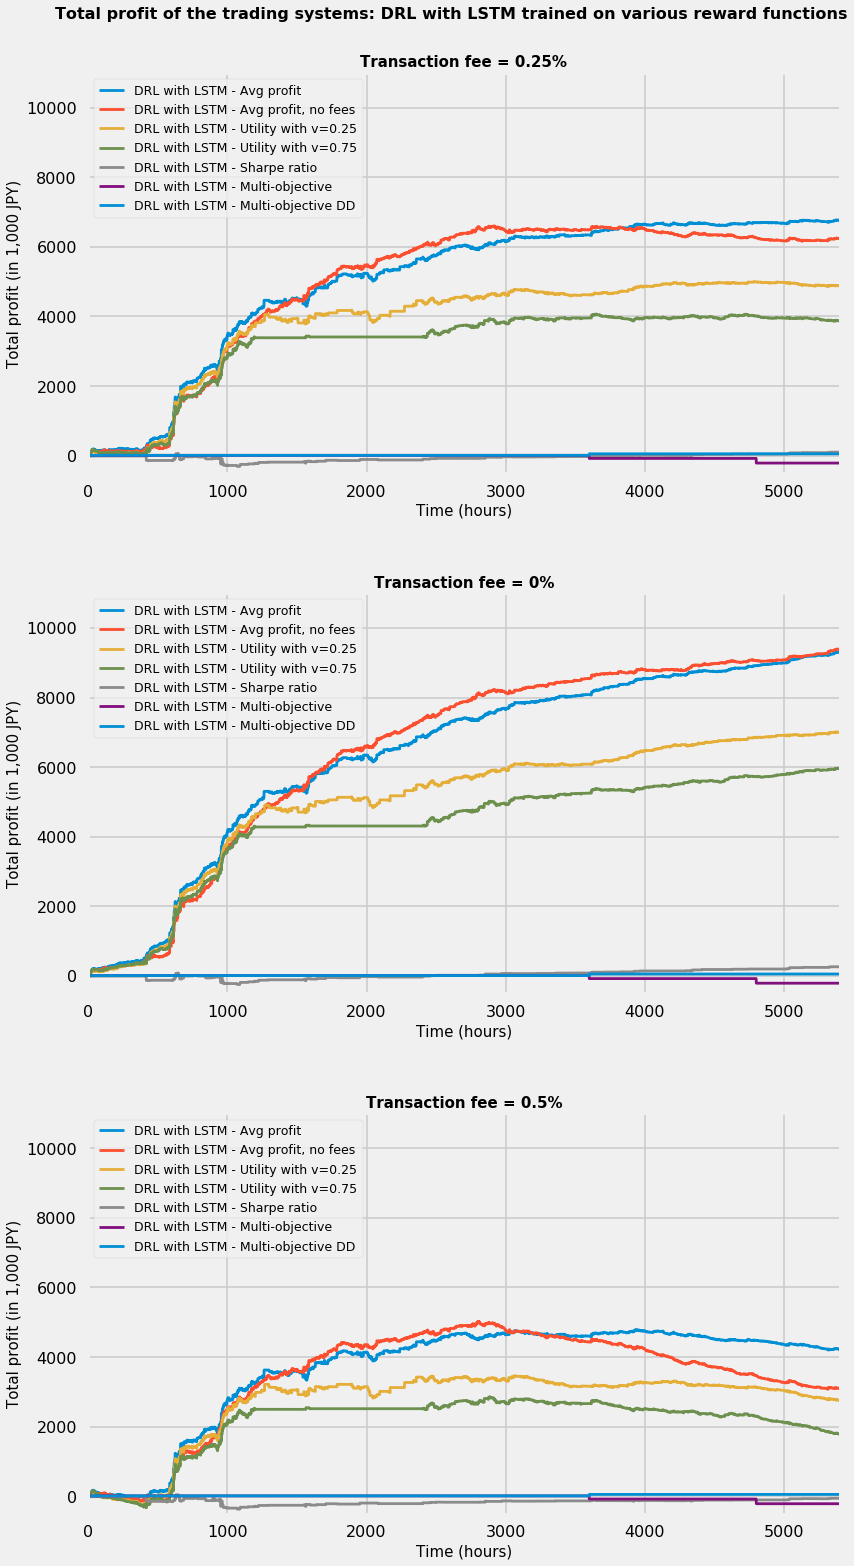

In [51]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,23  # figure size in inches

plt.clf()

fig, axs = plt.subplots(3, 1)


Z = 1

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))   
LSTM_B50_no_fees_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_no_fees_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_no_fees_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_no_fees_2_65k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a, fee = FEE*Z))

# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"]], THRESHOLD = 0.33)
# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_a, fee = FEE*Z))	
    
    
axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM - Avg profit')
axs[0].plot(LSTM_B50_no_fees_2_65k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM - Avg profit, no fees')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Utility with v=0.25')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Utility with v=0.75')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Sharpe ratio')

# axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p['profit_rescale_trade_cumsum_1k'] ,
#             label = 'DRL with LSTM - Sharpe Ratio Modified')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Multi-objective')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Multi-objective DD')

axs[0].set_xlim([0,5400])
axs[0].set_ylim([-500, 11000])
axs[0].set_xlabel("Time (hours)", size = 15)
axs[0].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("Transaction fee = 0.25%", size = 15, fontweight='bold')
axs[0].legend(loc = 2, prop={'size': 12.5})


fig.suptitle('Total profit of the trading systems: DRL with LSTM trained on various reward functions',
             fontsize=16,  fontweight='bold')



Z = 0

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))   
LSTM_B50_no_fees_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_no_fees_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_no_fees_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_no_fees_2_65k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a, fee = FEE*Z))

# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"]], THRESHOLD = 0.33)
# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_a, fee = FEE*Z))	

    
axs[1].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM - Avg profit')
axs[1].plot(LSTM_B50_no_fees_2_65k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM - Avg profit, no fees')

axs[1].plot(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Utility with v=0.25')

axs[1].plot(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Utility with v=0.75')

axs[1].plot(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Sharpe ratio')

# axs[1].plot(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p['profit_rescale_trade_cumsum_1k'] ,
#             label = 'DRL with LSTM - Sharpe Ratio Modified')

axs[1].plot(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Multi-objective')

axs[1].plot(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Multi-objective DD')

axs[1].set_xlim([0,5400])
axs[1].set_ylim([-500, 11000])
axs[1].set_xlabel("Time (hours)", size = 15)
axs[1].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[1].set_title("Transaction fee = 0%", size = 15, fontweight='bold')
axs[1].legend(loc = 2, prop={'size': 12.5})



Z = 2

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))   
LSTM_B50_no_fees_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_no_fees_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_no_fees_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_no_fees_2_65k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a, fee = FEE*Z))

# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"]], THRESHOLD = 0.33)
# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_a, fee = FEE*Z))	
    
    
axs[2].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM - Avg profit')
axs[2].plot(LSTM_B50_no_fees_2_65k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM - Avg profit, no fees')

axs[2].plot(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Utility with v=0.25')

axs[2].plot(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Utility with v=0.75')

axs[2].plot(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Sharpe ratio')

# axs[2].plot(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p['profit_rescale_trade_cumsum_1k'] ,
#             label = 'DRL with LSTM - Sharpe Ratio Modified')

axs[2].plot(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Multi-objective')

axs[2].plot(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Multi-objective DD')

axs[2].set_xlim([0,5400])
axs[2].set_ylim([-500, 11000])
axs[2].set_xlabel("Time (hours)", size = 15)
axs[2].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[2].set_title("Transaction fee = 0.5%", size = 15,  fontweight='bold')
axs[2].legend(loc = 2, prop={'size': 12.5})


fig.subplots_adjust(hspace = 0.3, top = 0.94)
plt.show()


In [44]:
RS.columns

Index(['PRICE_DIFF', 'LSTM_B50_1_60k', 'LSTM_B50_2_65k', 'LSTM_B50_3_75k',
       'LSTM_B50_Sharpe_14k', 'LSTM_B50_Dempster_55k',
       'LSTM_B50_no_fees_1_70k', 'LSTM_B50_no_fees_2_65k', 'RNN_B50_1_70k',
       'RNN_B50_2_60k', 'LSTM_B50_Stacked_N10_70k', 'LSTM_B50_Stacked_N20_70k',
       'LSTM_B50_Stacked_N40_55k', 'SL_LSTM_B50_N30_50k', 'SL_RNN_B50_N30',
       'SHOP_LSTM_B50_FEE20_68k', 'SHOP_RNN_B50_FEE20_60k',
       'RECURRENT_LSTM_B50_REAL_FEE20_68k', 'RECURRENT_RNN_B50_REAL_FEE20_60k',
       'RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k',
       'RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k',
       'RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k',
       'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_1_59k',
       'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k'],
      dtype='object')

In [268]:
RS.shape

(5400, 24)

In [269]:
Real_Price.shape

(8400, 2)

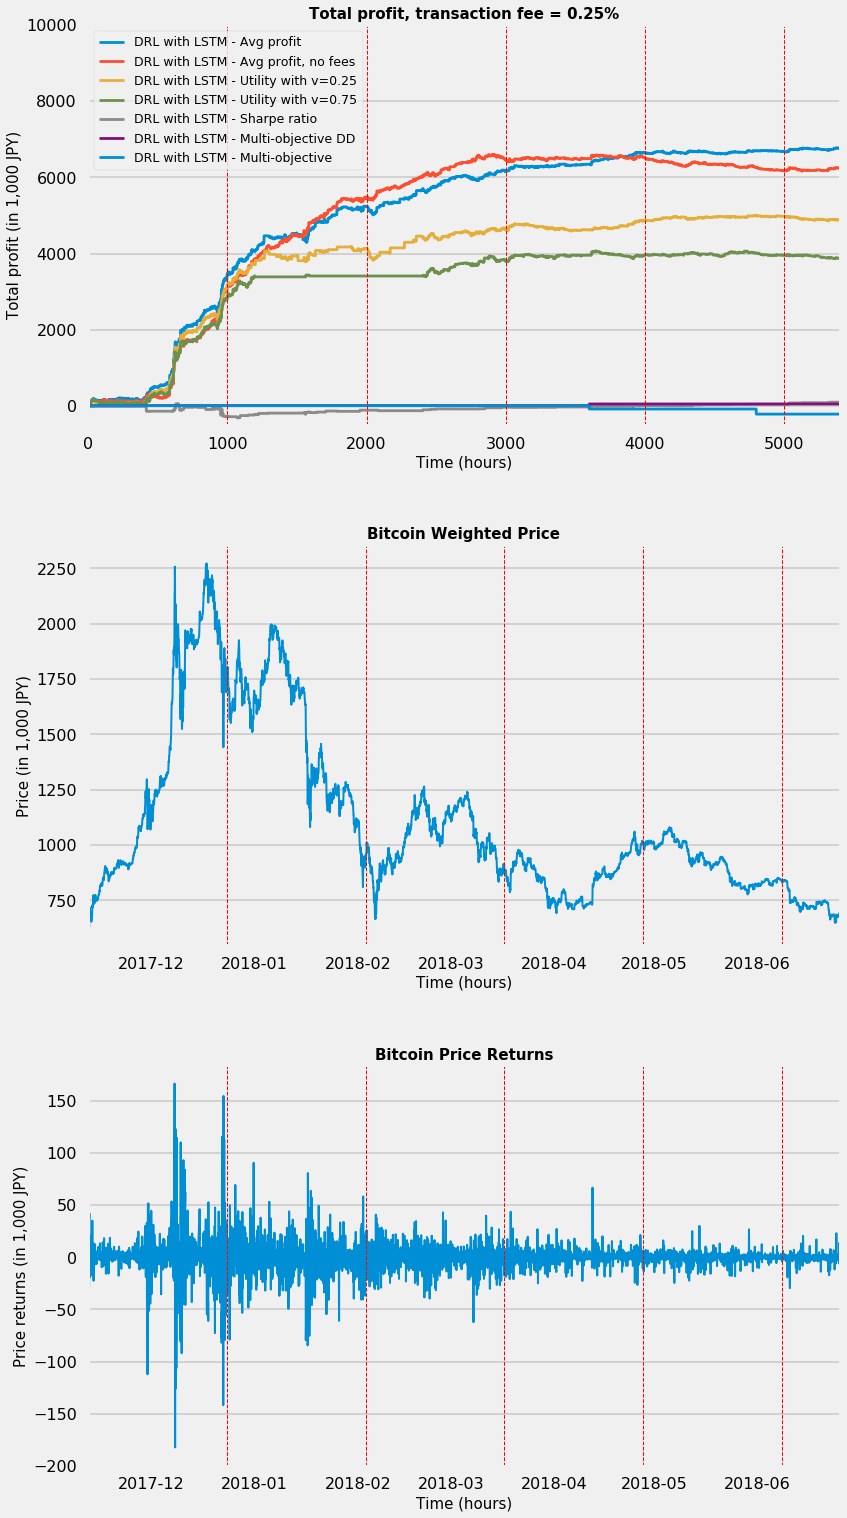

In [50]:
import datetime

# import seaborn as sns
# current_palette = sns.color_palette()
# sns.palplot(current_palette)

from cycler import cycler
custom_cycler = cycler('color', ['008fd5', 'fc4f30', 'e5ae38', '6d904f', '8b8b8b', '810f7c', '810f7c'])





#### from matplotlib import rcParams
rcParams['figure.figsize'] = 12,23  # figure size in inches
plt.clf()


fig, axs = plt.subplots(3, 1)


Z = 1

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))   
LSTM_B50_no_fees_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_no_fees_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_no_fees_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_no_fees_2_65k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a, fee = FEE*Z))

# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"]], THRESHOLD = 0.33)
# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_a, fee = FEE*Z))	
    
    

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM - Avg profit')
axs[0].plot(LSTM_B50_no_fees_2_65k_p['profit_rescale_trade_cumsum_1k'] , label = 'DRL with LSTM - Avg profit, no fees')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Utility with v=0.25')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Utility with v=0.75')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Sharpe ratio')

# axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p['profit_rescale_trade_cumsum_1k'] ,
#             label = 'DRL with LSTM - Sharpe Ratio Modified')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Multi-objective DD')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p['profit_rescale_trade_cumsum_1k'] ,
            label = 'DRL with LSTM - Multi-objective')


axs[0].set_xlim([0,5400])
axs[0].set_ylim([-500, 10000])



axs[0].set_xlabel("Time (hours)", size = 15)
axs[0].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("Total profit, transaction fee = 0.25%", size = 15, fontweight='bold')
axs[0].legend(loc = 2, prop={'size': 12.5})
axs[0].axvline(1000, color='r', linestyle='--', lw=1)
axs[0].axvline(2000, color='r', linestyle='--', lw=1)
axs[0].axvline(3000, color='r', linestyle='--', lw=1)
axs[0].axvline(4000, color='r', linestyle='--', lw=1)
axs[0].axvline(5000, color='r', linestyle='--', lw=1)
axs[0].xaxis.grid(False)
axs[0].set_prop_cycle(custom_cycler)
#fig.suptitle('Total Profit of the trading systems: DRL with RNN/LSTM/Stacked LSTM and Predicition-Based RNN/LSTM',
#             fontsize=16,  fontweight='bold')



axs[1].plot(Real_Price['Weighted_Price'][3000:]/1000, label = 'Bitcoin Weighted Price', linewidth=2)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[1].set_title("Bitcoin Weighted Price", size = 15,  fontweight='bold')
axs[1].set_xlabel("Time (hours)", size = 15)
axs[1].set_ylabel('Price (in 1,000 JPY)', size = 15)
axs[1].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[1].xaxis.grid(False)


axs[2].plot(Real_Price['Diff'][3000:]/1000, label = 'Bitcoin Price Returns', linewidth=2)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[2].set_title("Bitcoin Price Returns", size = 15,  fontweight='bold')
axs[2].set_xlabel("Time (hours)", size = 15)
axs[2].set_ylabel('Price returns (in 1,000 JPY)', size = 15)
axs[2].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[2].xaxis.grid(False)

fig.subplots_adjust(hspace = 0.3, top = 0.94)

plt.show()

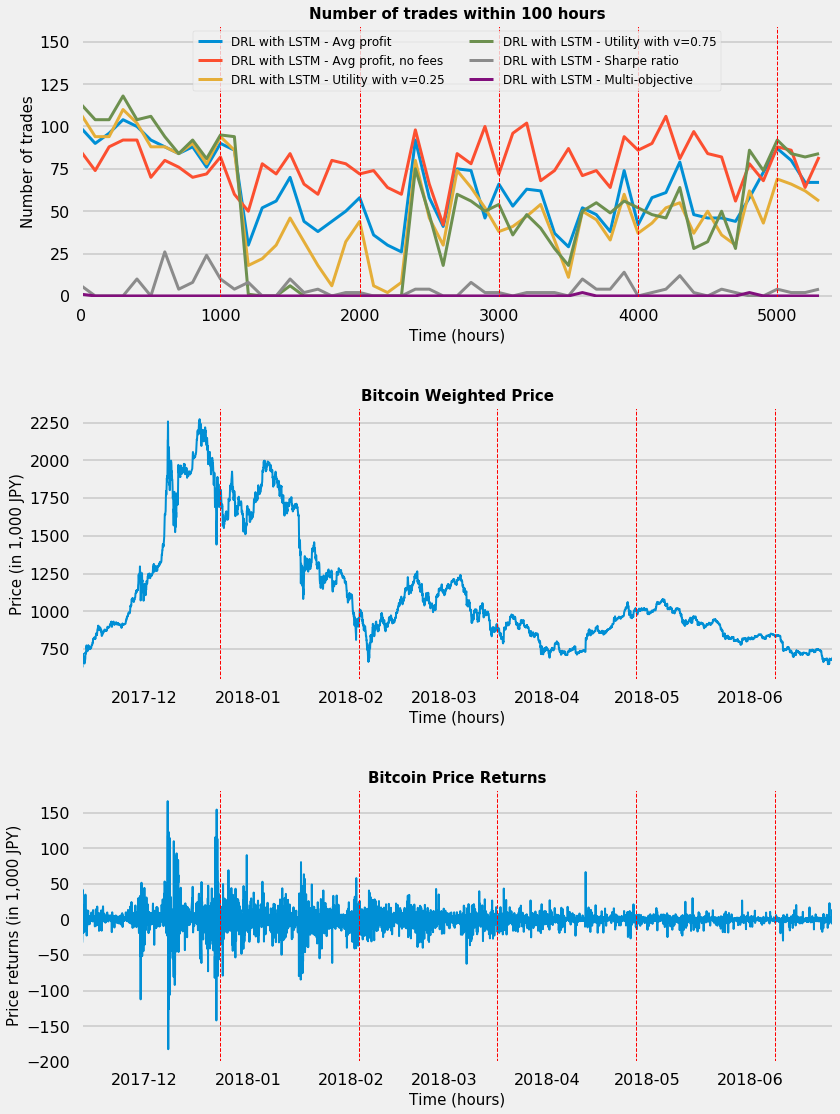

In [54]:
import datetime

#### from matplotlib import rcParams
rcParams['figure.figsize'] = 12,18  # figure size in inches
plt.clf()


Z = 1

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))   
LSTM_B50_no_fees_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_no_fees_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_no_fees_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_no_fees_2_65k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a, fee = FEE*Z))

# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"]], THRESHOLD = 0.33)
# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a, fee = FEE*Z))



fig, axs = plt.subplots(3, 1)


axs[0].plot(trading_freq(RECURRENT_LSTM_B50_REAL_FEE20_68k_p) , label = 'DRL with LSTM - Avg profit', marker = '_', linewidth=3)

axs[0].plot(trading_freq(LSTM_B50_no_fees_2_65k_p), label = 'DRL with LSTM - Avg profit, no fees', marker = '_', linewidth=3)

axs[0].plot(trading_freq(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p) ,
            label = 'DRL with LSTM - Utility with v=0.25', marker = '_', linewidth=3)

axs[0].plot(trading_freq(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p) ,
            label = 'DRL with LSTM - Utility with v=0.75', marker = '_', linewidth=3)

axs[0].plot(trading_freq(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p),
            label = 'DRL with LSTM - Sharpe ratio', marker = '_', linewidth=3)

# axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p['profit_rescale_trade_cumsum_1k'] ,
#             label = 'DRL with LSTM - Sharpe Ratio Modified')

axs[0].plot(trading_freq(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p),
            label = 'DRL with LSTM - Multi-objective', marker = '_', linewidth=3)




axs[0].set_xlabel("Time (hours)", size = 15)
axs[0].set_ylabel("Number of trades", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("Number of trades within 100 hours", size = 15,  fontweight='bold')

axs[0].axvline(1000, color='r', linestyle='--', lw=1)
axs[0].axvline(2000, color='r', linestyle='--', lw=1)
axs[0].axvline(3000, color='r', linestyle='--', lw=1)
axs[0].axvline(4000, color='r', linestyle='--', lw=1)
axs[0].axvline(5000, color='r', linestyle='--', lw=1)
axs[0].set_ylim([-1,160])
axs[0].set_xlim([0,5400])
axs[0].xaxis.grid(False)
axs[0].legend(loc = 9, prop={'size': 12}, ncol=2)


axs[1].plot(Real_Price['Weighted_Price'][3000:]/1000, label = 'Bitcoin Weighted Price', linewidth=2)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[1].set_title("Bitcoin Weighted Price", size = 15,  fontweight='bold')
axs[1].set_xlabel("Time (hours)", size = 15)
axs[1].set_ylabel('Price (in 1,000 JPY)', size = 15)
axs[1].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[1].xaxis.grid(False)


axs[2].plot(Real_Price['Diff'][3000:]/1000, label = 'Bitcoin Price Returns', linewidth=2)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[2].set_title("Bitcoin Price Returns", size = 15,  fontweight='bold')
axs[2].set_xlabel("Time (hours)", size = 15)
axs[2].set_ylabel('Price returns (in 1,000 JPY)', size = 15)
axs[2].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[2].xaxis.grid(False)

fig.subplots_adjust(hspace = 0.4, top = 0.87)

plt.show()

In [300]:
RECURRENT_LSTM_B50_REAL_FEE20_68k_p.head(10)

,price,result,action,action_diff,profit_rescale,profit_cum_rescale,profit_rescale_1k,profit_cum_rescale_1k,action_diff_cumsum,Trade_profit,Trade_duration,profit_rescale_trade_cumsum,profit_rescale_trade_cumsum_1k,profit_rescale_trade,profit_rescale_trade_1k
0,-6868.468838,-1.000000,-1,1.0,6118.468838,6118.468838,6.118469,6.118469,1.0,62629.659400,9,62629.659400,62.629659,62629.659400,62.629659
1,-2911.851654,-1.000000,-1,0.0,2911.851654,9030.320492,2.911852,9.030320,1.0,0.000000,9,62629.659400,62.629659,0.000000,0.000000
2,-4190.890500,-0.999360,-1,0.0,4190.890500,13221.210992,4.190891,13.221211,1.0,0.000000,9,62629.659400,62.629659,0.000000,0.000000
3,-4259.705280,-1.000000,-1,0.0,4259.705280,17480.916272,4.259705,17.480916,1.0,0.000000,9,62629.659400,62.629659,0.000000,0.000000
4,-15201.223288,-0.998050,-1,0.0,15201.223288,32682.139561,15.201223,32.682140,1.0,0.000000,9,62629.659400,62.629659,0.000000,0.000000
5,-5218.344821,-1.000000,-1,0.0,5218.344821,37900.484381,5.218345,37.900484,1.0,0.000000,9,62629.659400,62.629659,0.000000,0.000000
6,-32332.893917,-0.999995,-1,0.0,32332.893917,70233.378298,32.332894,70.233378,1.0,0.000000,9,62629.659400,62.629659,0.000000,0.000000
7,-26293.837393,-1.000000,-1,0.0,26293.837393,96527.215691,26.293837,96.527216,1.0,0.000000,9,62629.659400,62.629659,0.000000,0.000000
8,33897.556291,-0.999999,-1,0.0,-33897.556291,62629.659400,-33.897556,62.629659,1.0,0.000000,9,62629.659400,62.629659,0.000000,0.000000
9,42057.416954,0.999536,1,2.0,40557.416954,103187.076354,40.557417,103.187076,3.0,24031.099891,2,86660.759291,86.660759,24031.099891,24.031100


In [58]:
def moving_Sharpe(DF_p, bins = 400):
    DF_p["moving_Sharpe"] = DF_p.profit_rescale_trade_1k.rolling(bins).mean()/DF_p.profit_rescale_trade_1k.rolling(bins).std()
    return DF_p.moving_Sharpe

In [56]:
def moving_Sharpe(DF_p, bins = 400):
    DF_p = DF_p.reset_index()
    DF_p["index_bin"] = (round(np.floor(DF_p["index"].astype(float)/bins))*bins).astype(int)
    grouped100_mean = DF_p.groupby("index_bin").profit_rescale_trade_1k.mean()
    grouped100_std = DF_p.groupby("index_bin").profit_rescale_trade_1k.std()
    grouped100 = grouped100_mean/grouped100_std
    grouped100_rep = grouped100.iloc[np.arange(len(grouped100)).repeat(bins)]
    return grouped100_rep

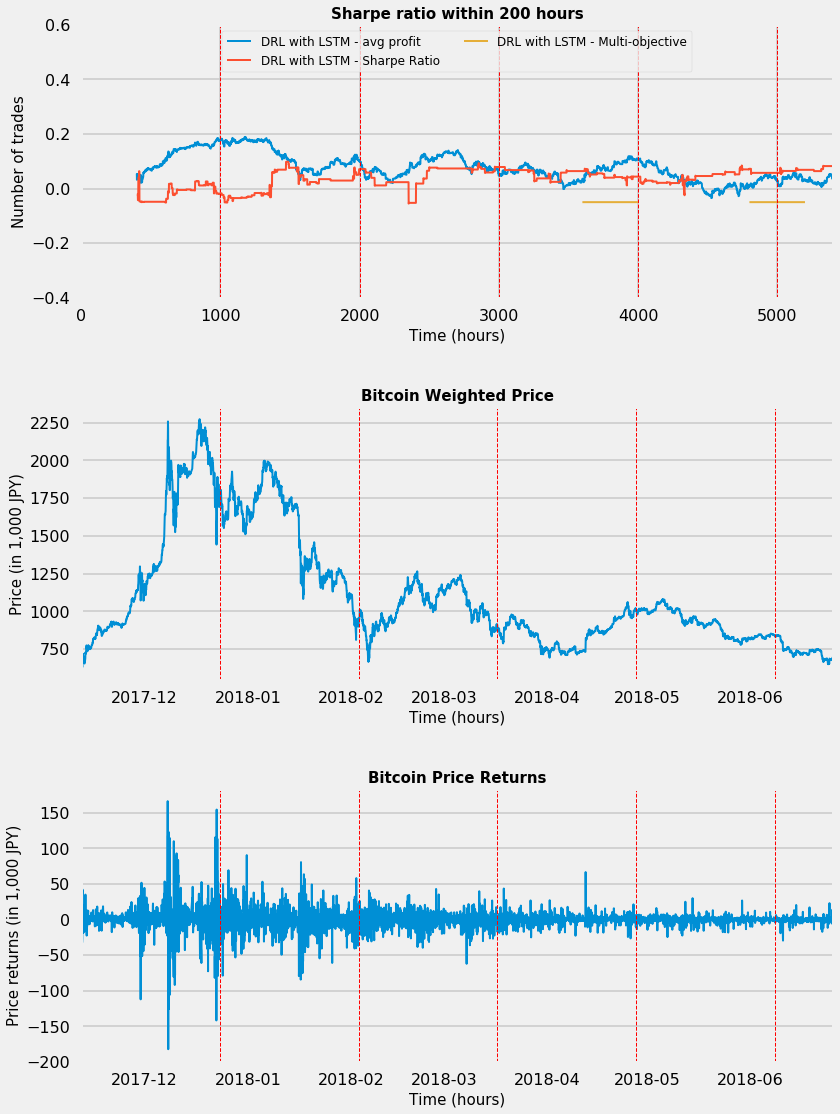

In [59]:
import datetime

#### from matplotlib import rcParams
rcParams['figure.figsize'] = 12,18  # figure size in inches
plt.clf()


Z = 1

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))   
LSTM_B50_no_fees_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_no_fees_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_no_fees_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_no_fees_2_65k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a, fee = FEE*Z))

# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"]], THRESHOLD = 0.33)
# RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a, fee = FEE*Z))



fig, axs = plt.subplots(3, 1)


axs[0].plot(moving_Sharpe(RECURRENT_LSTM_B50_REAL_FEE20_68k_p) ,
            label = 'DRL with LSTM - avg profit', marker = '_', linewidth=2)

# axs[0].plot(moving_Sharpe(LSTM_B50_no_fees_2_65k_p),
#             label = 'DRL with LSTM - avg profit, no fees', marker = '_', linewidth=2)

# axs[0].plot(moving_Sharpe(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p) ,
#             label = 'DRL with LSTM - Utility with v=0.25', marker = '_', linewidth=2)

# axs[0].plot(moving_Sharpe(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p) ,
#             label = 'DRL with LSTM - Utility with v=0.75', marker = '_', linewidth=2)

axs[0].plot(moving_Sharpe(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p),
            label = 'DRL with LSTM - Sharpe Ratio', marker = '_', linewidth=2)

# axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p['profit_rescale_trade_cumsum_1k'] ,
#             label = 'DRL with LSTM - Sharpe Ratio Modified')

axs[0].plot(moving_Sharpe(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p),
            label = 'DRL with LSTM - Multi-objective', marker = '_', linewidth=2)




axs[0].set_xlabel("Time (hours)", size = 15)
axs[0].set_ylabel("Number of trades", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("Sharpe ratio within 200 hours", size = 15,  fontweight='bold')

axs[0].axvline(1000, color='r', linestyle='--', lw=1)
axs[0].axvline(2000, color='r', linestyle='--', lw=1)
axs[0].axvline(3000, color='r', linestyle='--', lw=1)
axs[0].axvline(4000, color='r', linestyle='--', lw=1)
axs[0].axvline(5000, color='r', linestyle='--', lw=1)
axs[0].set_ylim([-0.4,0.6])
axs[0].set_xlim([0,5400])
axs[0].legend(loc = 9, prop={'size': 12}, ncol=2)


axs[1].plot(Real_Price['Weighted_Price'][3000:]/1000, label = 'Bitcoin Weighted Price', linewidth=2)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[1].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[1].set_title("Bitcoin Weighted Price", size = 15,  fontweight='bold')
axs[1].set_xlabel("Time (hours)", size = 15)
axs[1].set_ylabel('Price (in 1,000 JPY)', size = 15)
axs[1].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[1].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[1].xaxis.grid(False)

axs[2].plot(Real_Price['Diff'][3000:]/1000, label = 'Bitcoin Price Returns', linewidth=2)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=1000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=2000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=3000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=4000)), color='r', linestyle='--', lw=1)
axs[2].axvline((Real_Price.index[3000] + datetime.timedelta(hours=5000)), color='r', linestyle='--', lw=1)
axs[2].set_title("Bitcoin Price Returns", size = 15,  fontweight='bold')
axs[2].set_xlabel("Time (hours)", size = 15)
axs[2].set_ylabel('Price returns (in 1,000 JPY)', size = 15)
axs[2].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[2].set_xlim([Real_Price.index[3000], max(Real_Price.index)])
axs[2].xaxis.grid(False)

fig.subplots_adjust(hspace = 0.4, top = 0.87)

plt.show()

In [345]:
ST = RS[[#'PRICE_DIFF',
        'SL_LSTM_B50_N30_50k',
        'SL_RNN_B50_N30',
        'RECURRENT_RNN_B50_REAL_FEE20_60k',
        'RECURRENT_LSTM_B50_REAL_FEE20_68k',
        'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k',
    
        'LSTM_B50_no_fees_2_65k',
        'RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k',
        'RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k',
        'RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k',
        'RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt',
        'RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k']]

In [104]:
def number_of_trades(ABC_p):
    Trades_No = ABC_p[ABC_p.action_diff !=0].shape[0] # Only if trade took place
    Trades_No = ABC_p.action_diff.sum() # From short to long - count as two trades
    return Trades_No

def sharpe_ratio_trade(ABC_p):
    #ABC_ps = total_profit_tradewise(ABC_p)
    ABC_ps = ABC_p[ABC_p.action_diff !=0] # Only if trade took place
    Sharpe_Ratio = ABC_ps.profit_rescale_trade.mean()/ABC_ps.profit_rescale_trade.std()
    return Sharpe_Ratio

def downside_deviation(ABC_p, Min_Profit = 0):
    #ABC_ps = total_profit_tradewise(ABC_p)
    ABC_ps = ABC_p[ABC_p.action_diff !=0] # Only if trade took place
    Downside_Dev = ABC_ps.profit_rescale_trade.apply(lambda x: min(x - Min_Profit, 0)).std()
    return Downside_Dev

def volatility(ABC_p):
    #ABC_ps = total_profit_tradewise(ABC_p)
    ABC_ps = ABC_p[ABC_p.action_diff !=0] # Only if trade took place
    Vol = ABC_ps.profit_rescale_trade.std()
    return Vol

def avg_profit_per_trade(ABC_p):
    #ABC_ps = total_profit_tradewise(ABC_p)
    ABC_ps = ABC_p[ABC_p.action_diff !=0] # Only if trade took place
    Avg_Profit = ABC_ps.profit_rescale_trade.mean()
    return Avg_Profit

def avg_holding_time_h(ABC_p):
    #ABC_ps = total_profit_tradewise(ABC_p)
    ABC_ps = ABC_p[ABC_p.action_diff !=0]
    Avg_Duration = ABC_ps.Trade_duration.mean()
    return Avg_Duration



In [105]:
def Sortino_ratio(ABC_p, Min_Profit = 0):
    ABC_ps = ABC_p[ABC_p.action_diff !=0] # Only if trade took place
    Downside_Dev = ABC_ps.profit_rescale_trade.apply(lambda x: min(x - Min_Profit, 0)).std()
    Sortino_Ratio = ABC_ps.profit_rescale_trade.mean()/Downside_Dev
    return Sortino_Ratio

In [93]:
Z = 1

SL_LSTM_B50_N30_50k_a = action_from_results_df(RS[["PRICE_DIFF", "SL_LSTM_B50_N30_50k"]], THRESHOLD = 0.01)
SL_LSTM_B50_N30_50k_p = total_profit_tradewise(profit_from_result_df(SL_LSTM_B50_N30_50k_a, fee = FEE*Z))

SL_RNN_B50_N30_a = action_from_results_df(RS[["PRICE_DIFF", "SL_RNN_B50_N30"]], THRESHOLD = 0.01)
SL_RNN_B50_N30_p = total_profit_tradewise(profit_from_result_df(SL_RNN_B50_N30_a, fee = FEE*Z))


RECURRENT_RNN_B50_REAL_FEE20_60k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_RNN_B50_REAL_FEE20_60k"]], THRESHOLD = 0.33)
RECURRENT_RNN_B50_REAL_FEE20_60k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_RNN_B50_REAL_FEE20_60k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_68k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, fee = FEE*Z))

    
LSTM_B50_no_fees_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_no_fees_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_no_fees_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_no_fees_2_65k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_a, fee = FEE*Z))

RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_a, fee = FEE*Z))


In [106]:
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, fee = FEE*Z))

    
LSTM_B50_2_65k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = \
		total_profit_tradewise(profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z))
    
    
LSTM_B50_Stacked_N10_70k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N10_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N10_70k_p = \
		total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N10_70k_a, fee = FEE*Z))
    

LSTM_B50_Stacked_N20_70k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = \
		total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z))
    

LSTM_B50_Stacked_N40_55k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = \
		total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z))

In [ ]:
number_of_trades
sharpe_ratio_trade
downside_deviation
volatility
avg_profit_per_trade
avg_holding_time_h

In [378]:
print ("number_of_trades",
number_of_trades(SL_LSTM_B50_N30_50k_p),
number_of_trades(SL_RNN_B50_N30_p),
number_of_trades(RECURRENT_RNN_B50_REAL_FEE20_60k_p),
number_of_trades(RECURRENT_LSTM_B50_REAL_FEE20_68k_p),
number_of_trades(LSTM_B50_no_fees_2_65k_p),
number_of_trades(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p),
number_of_trades(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p),
number_of_trades(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p),
number_of_trades(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p),
number_of_trades(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p),
sep = "\n")



print ("sharpe_ratio_trade",
sharpe_ratio_trade(SL_LSTM_B50_N30_50k_p),
sharpe_ratio_trade(SL_RNN_B50_N30_p),
sharpe_ratio_trade(RECURRENT_RNN_B50_REAL_FEE20_60k_p),
sharpe_ratio_trade(RECURRENT_LSTM_B50_REAL_FEE20_68k_p),
sharpe_ratio_trade(LSTM_B50_no_fees_2_65k_p),
sharpe_ratio_trade(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p),
sharpe_ratio_trade(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p),
sharpe_ratio_trade(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p),
sharpe_ratio_trade(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p),
sharpe_ratio_trade(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p),
sep = "\n")



print ("downside_deviation",
downside_deviation(SL_LSTM_B50_N30_50k_p),
downside_deviation(SL_RNN_B50_N30_p),
downside_deviation(RECURRENT_RNN_B50_REAL_FEE20_60k_p),
downside_deviation(RECURRENT_LSTM_B50_REAL_FEE20_68k_p),
downside_deviation(LSTM_B50_no_fees_2_65k_p),
downside_deviation(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p),
downside_deviation(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p),
downside_deviation(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p),
downside_deviation(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p),
downside_deviation(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p),
sep = "\n")



print ("volatility",
volatility(SL_LSTM_B50_N30_50k_p),
volatility(SL_RNN_B50_N30_p),
volatility(RECURRENT_RNN_B50_REAL_FEE20_60k_p),
volatility(RECURRENT_LSTM_B50_REAL_FEE20_68k_p),
volatility(LSTM_B50_no_fees_2_65k_p),
volatility(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p),
volatility(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p),
volatility(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p),
volatility(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p),
volatility(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p),
sep = "\n")



print ("avg_profit_per_trade",
avg_profit_per_trade(SL_LSTM_B50_N30_50k_p),
avg_profit_per_trade(SL_RNN_B50_N30_p),
avg_profit_per_trade(RECURRENT_RNN_B50_REAL_FEE20_60k_p),
avg_profit_per_trade(RECURRENT_LSTM_B50_REAL_FEE20_68k_p),
avg_profit_per_trade(LSTM_B50_no_fees_2_65k_p),
avg_profit_per_trade(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p),
avg_profit_per_trade(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p),
avg_profit_per_trade(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p),
avg_profit_per_trade(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p),
avg_profit_per_trade(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p),
sep = "\n")



print ("avg_holding_time_h",
avg_holding_time_h(SL_LSTM_B50_N30_50k_p),
avg_holding_time_h(SL_RNN_B50_N30_p),
avg_holding_time_h(RECURRENT_RNN_B50_REAL_FEE20_60k_p),
avg_holding_time_h(RECURRENT_LSTM_B50_REAL_FEE20_68k_p),
avg_holding_time_h(LSTM_B50_no_fees_2_65k_p),
avg_holding_time_h(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p),
avg_holding_time_h(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p),
avg_holding_time_h(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p),
avg_holding_time_h(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p),
avg_holding_time_h(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p),
sep = "\n")

number_of_trades
3913.0
4307.0
4143.0
3391.0
4197.0
2835.0
2787.0
216.0
111.0
5.0
sharpe_ratio_trade
0.10042471151969833
0.06397189829104186
0.10541922291470315
0.1348325860731391
0.11854275838806762
0.1089706826915511
0.10159382353549458
0.01686834081578937
-0.06044726222895893
-0.9661763275198613
downside_deviation
7838.510442596528
10629.987301643076
7925.261531116863
8280.390358174289
7316.722030168856
9662.774547682688
7633.384849375791
20540.042636845505
77479.89624566311
67974.95864393415
volatility
21986.967938232097
22184.017133431247
21863.284578251318
23586.529417640977
22353.204440370795
26010.013813965197
22370.37995658105
27740.435993628675
113496.13249967177
73219.70218001894
avg_profit_per_trade
2208.0349123898145
1419.1536877465937
2304.8104706022673
3180.2327578707045
2649.8105131739553
2834.328962124462
2272.69243373086
467.93512871911906
-6860.530483180328
-70743.14295438868
avg_holding_time_h
2.2871664548919948
2.2518765638031693
2.18978102189781
2.5435704192180877

In [94]:

print ("Sortino_ratio",
Sortino_ratio(SL_LSTM_B50_N30_50k_p),
Sortino_ratio(SL_RNN_B50_N30_p),
Sortino_ratio(RECURRENT_RNN_B50_REAL_FEE20_60k_p),
Sortino_ratio(RECURRENT_LSTM_B50_REAL_FEE20_68k_p),
Sortino_ratio(LSTM_B50_no_fees_2_65k_p),
Sortino_ratio(RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p),
Sortino_ratio(RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p),
Sortino_ratio(RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p),
Sortino_ratio(RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p),
Sortino_ratio(RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p),
sep = "\n")

Sortino_ratio
0.2816906258605936
0.13350473970248625
0.2908182224085497
0.3840679750962731
0.36215814981737166
0.29332454649934725
0.2977306239075194
0.022781604546415063
-0.08854594308474363
-1.0407235894758657


In [100]:
print ("Total Profit",
SL_LSTM_B50_N30_50k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
SL_RNN_B50_N30_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
LSTM_B50_no_fees_2_65k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
sep = "\n")

Total Profit
5213.17042815
3403.13054322
5683.66262051
6751.63414496
6240.30375852
4877.88014382
3870.39521464
101.073987803
-754.65835315
-212.229428863


In [107]:

print ("Total Profit",
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
LSTM_B50_2_65k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
LSTM_B50_Stacked_N10_70k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
LSTM_B50_Stacked_N20_70k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
LSTM_B50_Stacked_N40_55k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],
sep = "\n")


print ("avg_profit_per_trade",
avg_profit_per_trade(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p),
avg_profit_per_trade(LSTM_B50_2_65k_p),
avg_profit_per_trade(LSTM_B50_Stacked_N10_70k_p),
avg_profit_per_trade(LSTM_B50_Stacked_N20_70k_p),
avg_profit_per_trade(LSTM_B50_Stacked_N40_55k_p),
sep = "\n")


print ("number_of_trades",
number_of_trades(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p),
number_of_trades(LSTM_B50_2_65k_p),
number_of_trades(LSTM_B50_Stacked_N10_70k_p),
number_of_trades(LSTM_B50_Stacked_N20_70k_p),
number_of_trades(LSTM_B50_Stacked_N40_55k_p),
sep = "\n")


print ("avg_holding_time_h",
avg_holding_time_h(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p),
avg_holding_time_h(LSTM_B50_2_65k_p),
avg_holding_time_h(LSTM_B50_Stacked_N10_70k_p),
avg_holding_time_h(LSTM_B50_Stacked_N20_70k_p),
avg_holding_time_h(LSTM_B50_Stacked_N40_55k_p),
sep = "\n")


print ("volatility",
volatility(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p),
volatility(LSTM_B50_2_65k_p),
volatility(LSTM_B50_Stacked_N10_70k_p),
volatility(LSTM_B50_Stacked_N20_70k_p),
volatility(LSTM_B50_Stacked_N40_55k_p),
sep = "\n")


print ("downside_deviation",
downside_deviation(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p),
downside_deviation(LSTM_B50_2_65k_p),
downside_deviation(LSTM_B50_Stacked_N10_70k_p),
downside_deviation(LSTM_B50_Stacked_N20_70k_p),
downside_deviation(LSTM_B50_Stacked_N40_55k_p),
sep = "\n")


print ("sharpe_ratio_trade",
sharpe_ratio_trade(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p),
sharpe_ratio_trade(LSTM_B50_2_65k_p),
sharpe_ratio_trade(LSTM_B50_Stacked_N10_70k_p),
sharpe_ratio_trade(LSTM_B50_Stacked_N20_70k_p),
sharpe_ratio_trade(LSTM_B50_Stacked_N40_55k_p),
sep = "\n")


print ("Sortino_ratio",
Sortino_ratio(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p),
Sortino_ratio(LSTM_B50_2_65k_p),
Sortino_ratio(LSTM_B50_Stacked_N10_70k_p),
Sortino_ratio(LSTM_B50_Stacked_N20_70k_p),
Sortino_ratio(LSTM_B50_Stacked_N40_55k_p),
sep = "\n")


Total Profit
6684.41876519
6325.19274527
6521.74555776
6534.11659399
4991.76078833
avg_profit_per_trade
2529.1028245151365
2606.1774805398386
2252.7618506950553
2492.9861098767087
1680.7275381596016
number_of_trades
4657.0
4163.0
5495.0
4983.0
5614.0
avg_holding_time_h
2.0431328036322363
2.2249690976514214
1.8652849740932642
2.0602823349866464
1.8181818181818181
volatility
20937.592473914236
22368.38187432776
21928.213522215476
21019.673039442598
20436.036523029874
downside_deviation
6913.622019901466
7056.576063348364
7931.967395618258
7717.176906125881
8571.023160619345
sharpe_ratio_trade
0.12079243722343433
0.11651166790615973
0.10273348754164502
0.11860251609046046
0.082243322293222
Sortino_ratio
0.3658144482349328
0.36932606651492683
0.2840104778972637
0.32304379440852016
0.1960941542990944


In [108]:
RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k = pd.read_csv('20190202-yhat_test_lstm_multi_downside_dev.csv', header=None)

RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k = RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k.rename(columns={ 1: "RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k"})

RS = pd.concat([RS,
 RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k["RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k"]
], axis = 1)

TypeError: 'tuple' object is not callable

In [110]:
RS.shape
RS = RS[:5400]

list(RS)

['PRICE_DIFF',
 'LSTM_B50_1_60k',
 'LSTM_B50_2_65k',
 'LSTM_B50_3_75k',
 'LSTM_B50_Sharpe_14k',
 'LSTM_B50_Dempster_55k',
 'LSTM_B50_no_fees_1_70k',
 'LSTM_B50_no_fees_2_65k',
 'RNN_B50_1_70k',
 'RNN_B50_2_60k',
 'LSTM_B50_Stacked_N10_70k',
 'LSTM_B50_Stacked_N20_70k',
 'LSTM_B50_Stacked_N40_55k',
 'SL_LSTM_B50_N30_50k',
 'SL_RNN_B50_N30',
 'SHOP_LSTM_B50_FEE20_68k',
 'SHOP_RNN_B50_FEE20_60k',
 'RECURRENT_LSTM_B50_REAL_FEE20_68k',
 'RECURRENT_RNN_B50_REAL_FEE20_60k',
 'RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k',
 'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_1_59k',
 'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt',
 'RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k']

In [112]:
RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_a = \
		action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p = \
		total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_a, fee = FEE*Z))	

print(
RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p['profit_rescale_trade_cumsum_1k'].iloc[-1],		
avg_profit_per_trade(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p),
number_of_trades(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p),
avg_holding_time_h(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p),
volatility(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p),
downside_deviation(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p),
sharpe_ratio_trade(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p),
# Sortino_ratio(RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k_p),
sep = "\n")

53.7031244032
26851.56220158347
3.0
2700.0
24398.144632837917
0.0
1.1005575467178539


In [138]:
RS.to_csv("20190202_RS_with_Rucurrentshop.csv", sep=",")

In [ ]:
plt.style.use(['dark_background', 'presentation'])

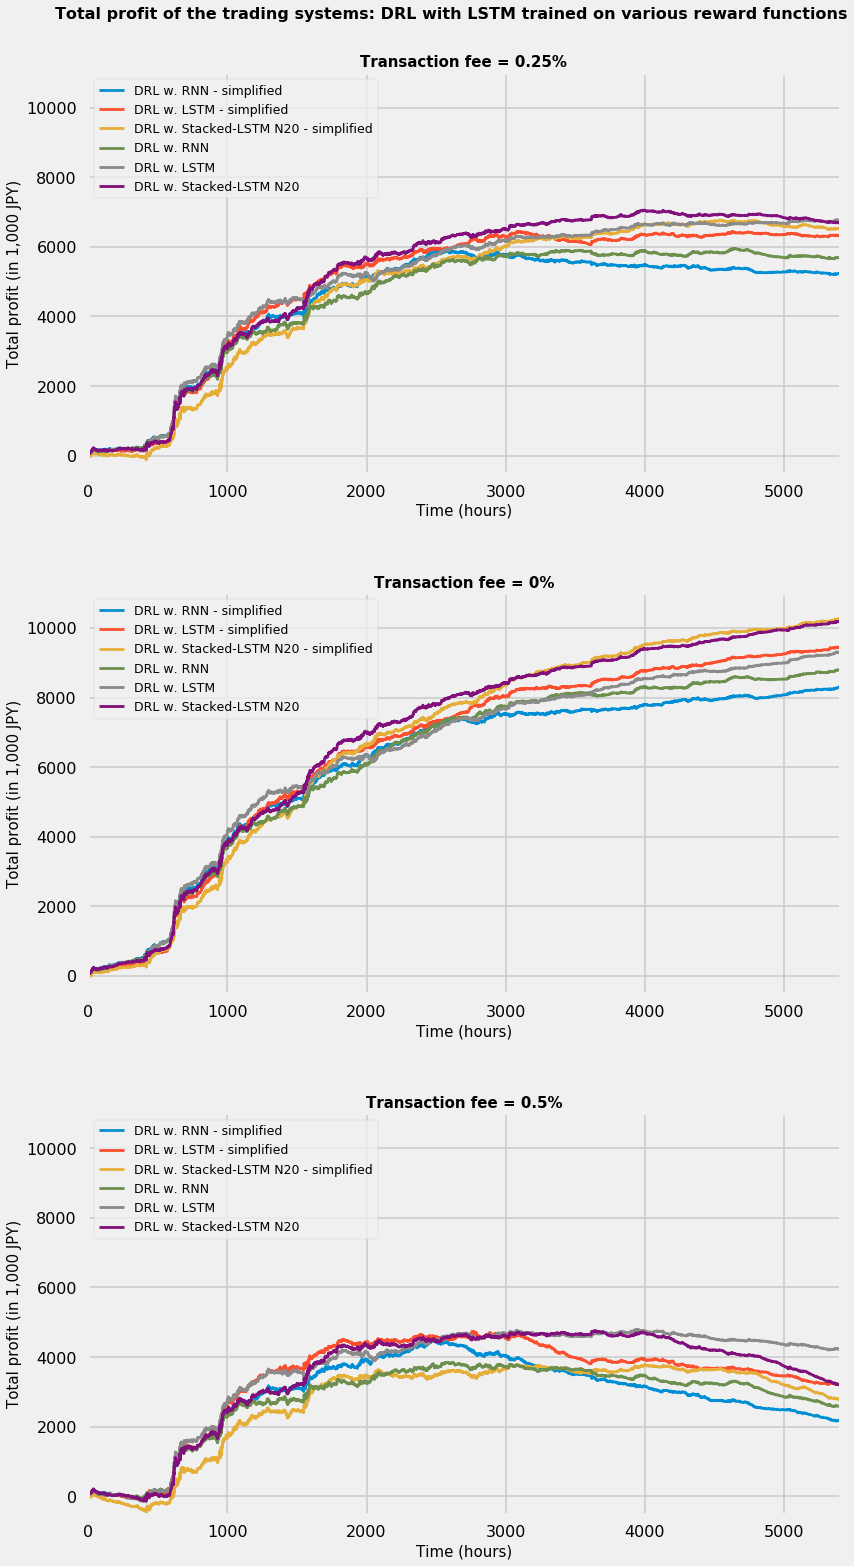

In [60]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,23  # figure size in inches

plt.clf()

fig, axs = plt.subplots(3, 1)


Z = 1

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p = total_profit_tradewise(profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z))   

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z))   

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z))   

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z))   

RECURRENT_RNN_B50_REAL_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_RNN_B50_REAL_FEE20_60k"]], THRESHOLD = 0.33)
RECURRENT_RNN_B50_REAL_FEE20_60k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_RNN_B50_REAL_FEE20_60k_a, 
                                                                                   fee = FEE*Z))   
RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))   
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, 
                                                                                   fee = FEE*Z))   

axs[0].plot(RNN_B50_2_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN - simplified')

axs[0].plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM - simplified')

axs[0].plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20 - simplified')

# axs[0].plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N40 - simplified')

axs[0].plot(RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN')

axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM')

axs[0].plot(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20')

axs[0].set_xlim([0,5400])
axs[0].set_ylim([-500, 11000])
axs[0].set_xlabel("Time (hours)", size = 15)
axs[0].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("Transaction fee = 0.25%", size = 15, fontweight='bold')
axs[0].legend(loc = 2, prop={'size': 12.5})


fig.suptitle('Total profit of the trading systems: DRL with LSTM trained on various reward functions',
             fontsize=16,  fontweight='bold')



Z = 0

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p = total_profit_tradewise(profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z))   

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z))   

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z))   

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z))   

RECURRENT_RNN_B50_REAL_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_RNN_B50_REAL_FEE20_60k"]], THRESHOLD = 0.33)
RECURRENT_RNN_B50_REAL_FEE20_60k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_RNN_B50_REAL_FEE20_60k_a, 
                                                                                   fee = FEE*Z))   
RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))   
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, 
                                                                                   fee = FEE*Z))   

axs[1].plot(RNN_B50_2_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN - simplified')

axs[1].plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM - simplified')

axs[1].plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20 - simplified')

# axs[1].plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N40 - simplified')

axs[1].plot(RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN')

axs[1].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM')

axs[1].plot(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20')

axs[1].set_xlim([0,5400])
axs[1].set_ylim([-500, 11000])
axs[1].set_xlabel("Time (hours)", size = 15)
axs[1].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[1].set_title("Transaction fee = 0%", size = 15, fontweight='bold')
axs[1].legend(loc = 2, prop={'size': 12.5})



Z = 2

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p = total_profit_tradewise(profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z))   

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z))   

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z))   

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z))   

RECURRENT_RNN_B50_REAL_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_RNN_B50_REAL_FEE20_60k"]], THRESHOLD = 0.33)
RECURRENT_RNN_B50_REAL_FEE20_60k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_RNN_B50_REAL_FEE20_60k_a, 
                                                                                   fee = FEE*Z))   
RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))   
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, 
                                                                                   fee = FEE*Z))   

axs[2].plot(RNN_B50_2_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN - simplified')

axs[2].plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM - simplified')

axs[2].plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20 - simplified')

# axs[2].plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N40 - simplified')

axs[2].plot(RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN')

axs[2].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM')

axs[2].plot(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20')

axs[2].set_xlim([0,5400])
axs[2].set_ylim([-500, 11000])
axs[2].set_xlabel("Time (hours)", size = 15)
axs[2].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[2].set_title("Transaction fee = 0.5%", size = 15,  fontweight='bold')
axs[2].legend(loc = 2, prop={'size': 12.5})


fig.subplots_adjust(hspace = 0.3, top = 0.94)
plt.show()


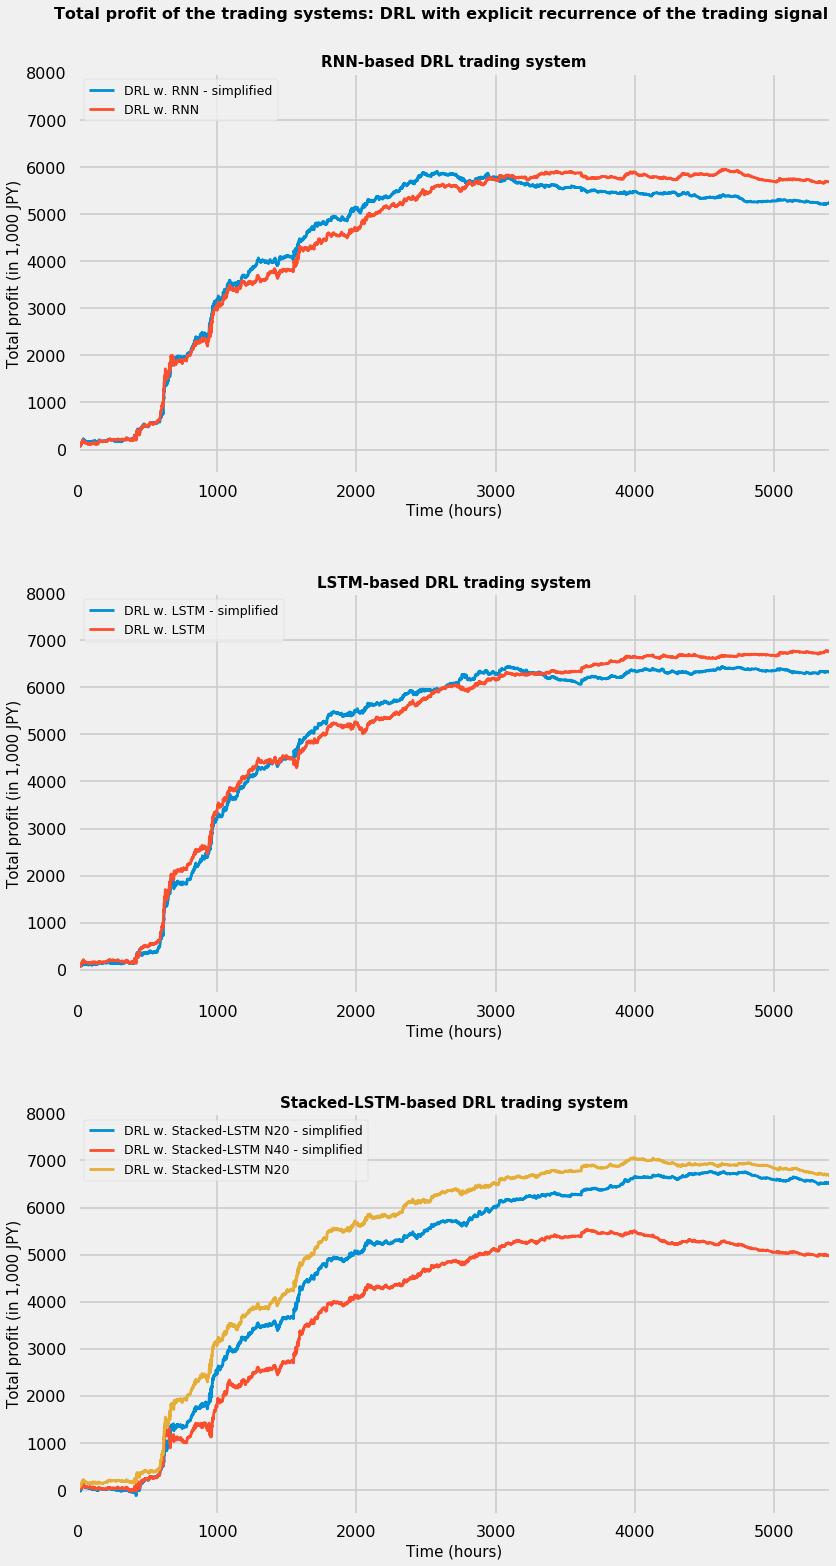

In [61]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,23  # figure size in inches

plt.clf()

fig, axs = plt.subplots(3, 1)


Z = 1

RNN_B50_2_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RNN_B50_2_60k"]], THRESHOLD = 0.33)
RNN_B50_2_60k_p = total_profit_tradewise(profit_from_result_df(RNN_B50_2_60k_a, fee = FEE*Z))   

LSTM_B50_2_65k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_2_65k"]], THRESHOLD = 0.33)
LSTM_B50_2_65k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_2_65k_a, fee = FEE*Z))   

LSTM_B50_Stacked_N20_70k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N20_70k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N20_70k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N20_70k_a, fee = FEE*Z))   

LSTM_B50_Stacked_N40_55k_a = action_from_results_df(RS[["PRICE_DIFF", "LSTM_B50_Stacked_N40_55k"]], THRESHOLD = 0.33)
LSTM_B50_Stacked_N40_55k_p = total_profit_tradewise(profit_from_result_df(LSTM_B50_Stacked_N40_55k_a, fee = FEE*Z))   

RECURRENT_RNN_B50_REAL_FEE20_60k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_RNN_B50_REAL_FEE20_60k"]], THRESHOLD = 0.33)
RECURRENT_RNN_B50_REAL_FEE20_60k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_RNN_B50_REAL_FEE20_60k_a, 
                                                                                   fee = FEE*Z))   
RECURRENT_LSTM_B50_REAL_FEE20_68k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_FEE20_68k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_FEE20_68k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_FEE20_68k_a, 
                                                                                   fee = FEE*Z))   
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a = action_from_results_df(RS[["PRICE_DIFF", "RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k"]], THRESHOLD = 0.33)
RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p = total_profit_tradewise(profit_from_result_df(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_a, 
                                                                                   fee = FEE*Z))   

axs[0].plot(RNN_B50_2_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN - simplified')

# axs[0].plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM - simplified')

# axs[0].plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20 - simplified')

# axs[0].plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N40 - simplified')

axs[0].plot(RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN')

# axs[0].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM')

# axs[0].plot(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20')

axs[0].set_xlim([0,5400])
axs[0].set_ylim([-500, 8000])
axs[0].set_xlabel("Time (hours)", size = 15)
axs[0].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[0].set_title("RNN-based DRL trading system", size = 15, fontweight='bold')
axs[0].legend(loc = 2, prop={'size': 12.5})


fig.suptitle('Total profit of the trading systems: DRL with explicit recurrence of the trading signal',
             fontsize=16,  fontweight='bold')



# axs[1].plot(RNN_B50_2_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN - simplified')

axs[1].plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM - simplified')

# axs[1].plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20 - simplified')

# axs[1].plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N40 - simplified')

# axs[1].plot(RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN')

axs[1].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM')

# axs[1].plot(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20')

axs[1].set_xlim([0,5400])
axs[1].set_ylim([-500, 8000])
axs[1].set_xlabel("Time (hours)", size = 15)
axs[1].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[1].set_title("LSTM-based DRL trading system", size = 15, fontweight='bold')
axs[1].legend(loc = 2, prop={'size': 12.5})



# axs[2].plot(RNN_B50_2_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN - simplified')

# axs[2].plot(LSTM_B50_2_65k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM - simplified')

axs[2].plot(LSTM_B50_Stacked_N20_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20 - simplified')

axs[2].plot(LSTM_B50_Stacked_N40_55k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N40 - simplified')

# axs[2].plot(RECURRENT_RNN_B50_REAL_FEE20_60k_p['profit_cum_rescale_1k'] , label = 'DRL w. RNN')

# axs[2].plot(RECURRENT_LSTM_B50_REAL_FEE20_68k_p['profit_cum_rescale_1k'] , label = 'DRL w. LSTM')

axs[2].plot(RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k_p['profit_cum_rescale_1k'] , label = 'DRL w. Stacked-LSTM N20')

axs[2].set_xlim([0,5400])
axs[2].set_ylim([-500, 8000])
axs[2].set_xlabel("Time (hours)", size = 15)
axs[2].set_ylabel("Total profit (in 1,000 JPY)", size = 15)
# plt.title("Profit&Loss curves of different trading systems: DRL based on RNN, DRL based on LSTM and DRL based on stacked LSTM")
axs[2].set_title("Stacked-LSTM-based DRL trading system", size = 15,  fontweight='bold')
axs[2].legend(loc = 2, prop={'size': 12.5})


fig.subplots_adjust(hspace = 0.3, top = 0.94)
plt.show()


In [17]:
list(RS)

['PRICE_DIFF',
 'LSTM_B50_1_60k',
 'LSTM_B50_2_65k',
 'LSTM_B50_3_75k',
 'LSTM_B50_Sharpe_14k',
 'LSTM_B50_Dempster_55k',
 'LSTM_B50_no_fees_1_70k',
 'LSTM_B50_no_fees_2_65k',
 'RNN_B50_1_70k',
 'RNN_B50_2_60k',
 'LSTM_B50_Stacked_N10_70k',
 'LSTM_B50_Stacked_N20_70k',
 'LSTM_B50_Stacked_N40_55k',
 'SL_LSTM_B50_N30_50k',
 'SL_RNN_B50_N30',
 'SHOP_LSTM_B50_FEE20_68k',
 'SHOP_RNN_B50_FEE20_60k',
 'RECURRENT_LSTM_B50_REAL_FEE20_68k',
 'RECURRENT_RNN_B50_REAL_FEE20_60k',
 'RECURRENT_LSTM_B50_REAL_FEE20_SHAPRE_1k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Dempster025_1_50k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Dempster075_2_40k',
 'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_1_59k',
 'RECURRENT_LSTM_B50_REAL_Stacked_adv_N20_2_70k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Multi_0k',
 'RECURRENT_LSTM_B50_REAL_FEE20_Sharpe_Sqrt',
 'RECURRENT_LSTM_B50_REAL_FEE20_Multi_Dev_10k']